Andrea Hanel 2024

# Fig. S 5F

- EdgeR (pseudobulk-level) DE analysis btw KI (ETV6::RUNX1) and WT iPSC

In [2]:
library(tidyverse)
library(data.table)
library(matrixStats)
library(ggplot2)
library(anndata)
library(edgeR)
library(scales)
library(knitr)

#to be able to adjust figs
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘anndata’


The foll

In [3]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.4 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /research/users/andreha/miniconda3/envs/tired_like_a_kitten/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.utf8         LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Helsinki
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] knitr_1.47        scales_1.3.0      edgeR_4.0.16      limma_3.58.1     
 [5] anndata_0.7.5.6   matrixStats_1.3.0 data.table_1.15.2 lubridate_1.9.3  
 [9] forcats_1.0.0     stringr_1.5.

In [4]:
ad = read_h5ad("/research/groups/sysgen/PROJECTS/sysgen_team/andrea_work/2023_Fischer_iPSC/revision_final/data/adata2_leiden_FS_pbulk.h5ad")


In [5]:
x = t(ad$X)
head(x, n=2)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
A1BG,2993,1477,1863,1929,262,1041,326,884,836,243,⋯,1321,455,712,45,648,33,171,45,235,30
A1BG-AS1,482,216,237,244,58,264,57,206,132,28,⋯,167,76,154,5,97,7,39,4,22,11


In [6]:
head(ad$obs)

,sample,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072
ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232
HW8_ETV6_RUNX1_KI_0,HW8_ETV6_RUNX1_KI,KI,HW8,0,3040,67216960
HW8_WT_0,HW8_WT,WT,HW8,0,2273,57123564
ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,1,722,19389934
ChiPSC12_WT_1,ChiPSC12_WT,WT,ChiPSC12,1,3511,101122712


In [17]:
ad$obs$cell_type =  as.factor(ad$obs$leiden_res0_25)

In [19]:
d = data.frame(table(ad$obs$cell_type))
d

Var1,Freq
<fct>,<int>
0,4
1,4
2,4
3,4
4,4
5,4


> we have 2 and 2 per each cluster (min cells 10)

## LOOP PER CLUSTER

In [20]:
unique(ad$obs$cell_type)

[1] 0 1 2 3 4 5
Levels: 0 1 2 3 4 5

In [21]:
head(sampleinfo, n=3)

,sample,sampletype,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts,cell_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072,0
2,ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232,0
3,HW8_ETV6_RUNX1_KI_0,HW8_ETV6_RUNX1_KI,KI,HW8,0,3040,67216960,0


[1] "Processing Cluster 0 ..."
keep
FALSE  TRUE 
12827 20311 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_0    KI 99440035    1.0198268
ChiPSC12_WT_0               WT 42640077    0.9565463
HW8_ETV6_RUNX1_KI_0         KI 67186628    1.0150111
HW8_WT_0                    WT 57096565    1.0099428
[1] "MDS plot for Cluster 0"
[1] "BCV plot for 0"


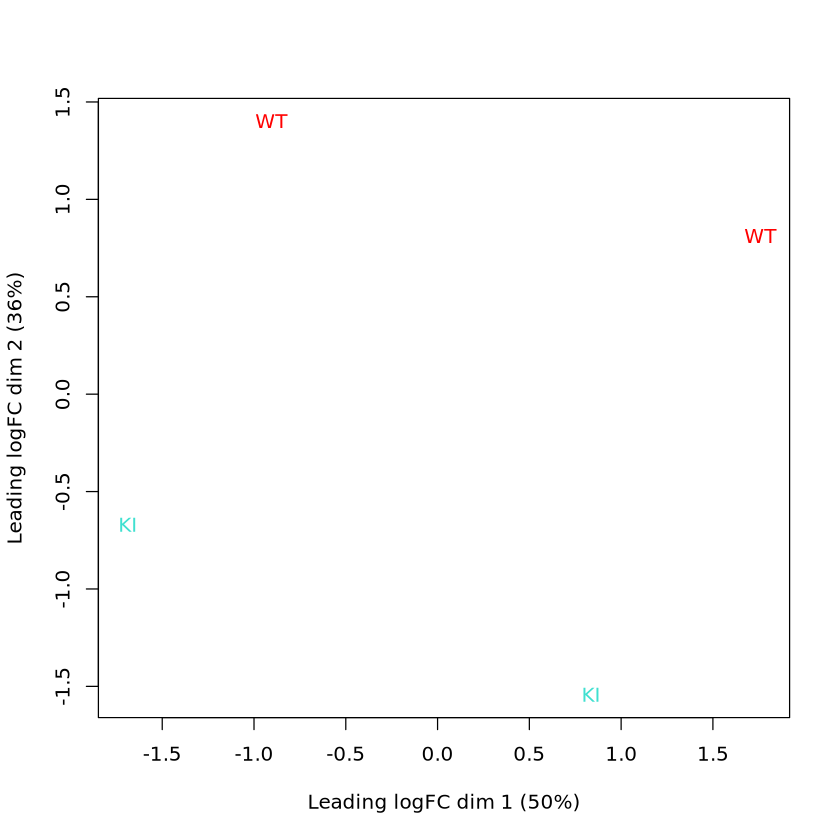

[1] "QL dispersion estimates for 0"


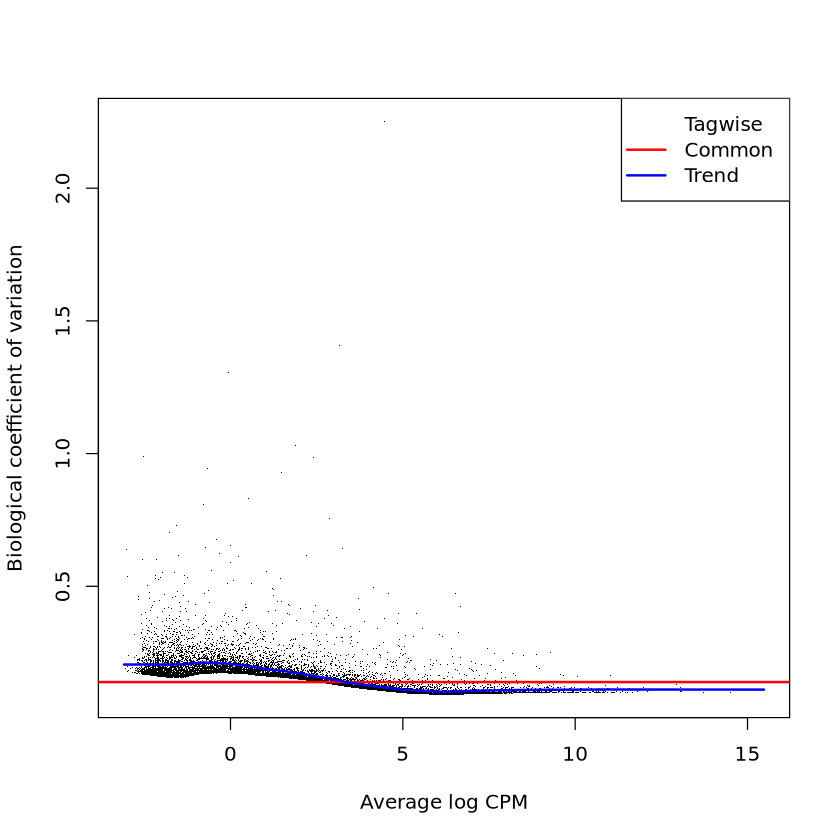

[1] "DE results for Cluster 0"
              Contrast Total  Up Down Ratio NotSig
1 1*groupKI -1*groupWT   577 399  178  2.24  19734
[1] "Processing Cluster 1 ..."
keep
FALSE  TRUE 
13214 19924 
                         group  lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_1    KI  19379706    1.0419048
ChiPSC12_WT_1               WT 101075675    0.9567824
HW8_ETV6_RUNX1_KI_1         KI  23642154    1.0279305
HW8_WT_1                    WT  88887766    0.9758768
[1] "MDS plot for Cluster 1"


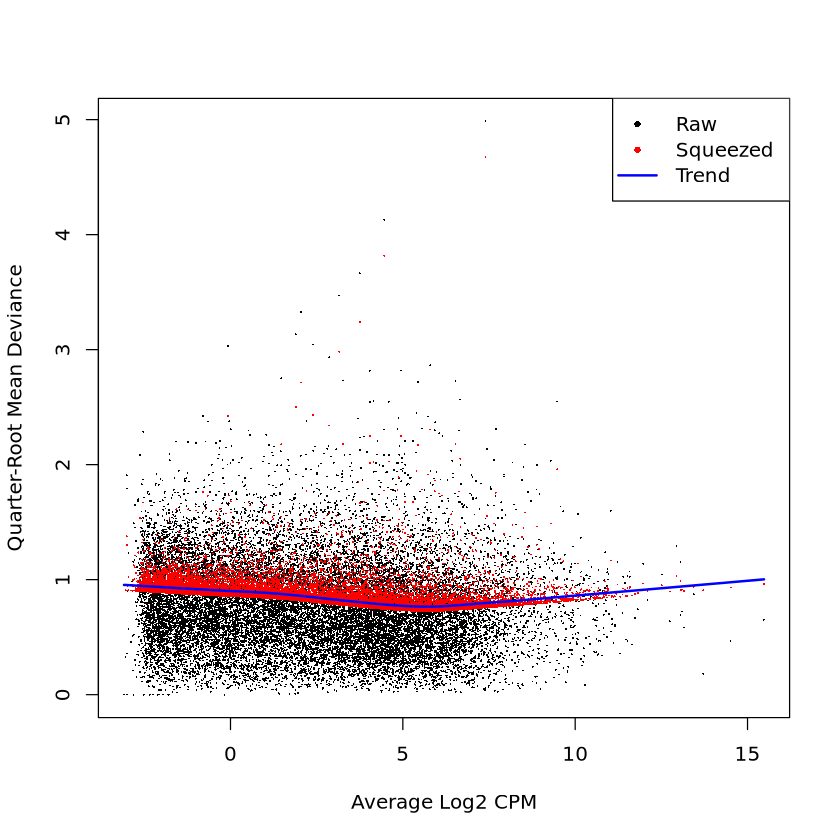

[1] "BCV plot for 1"


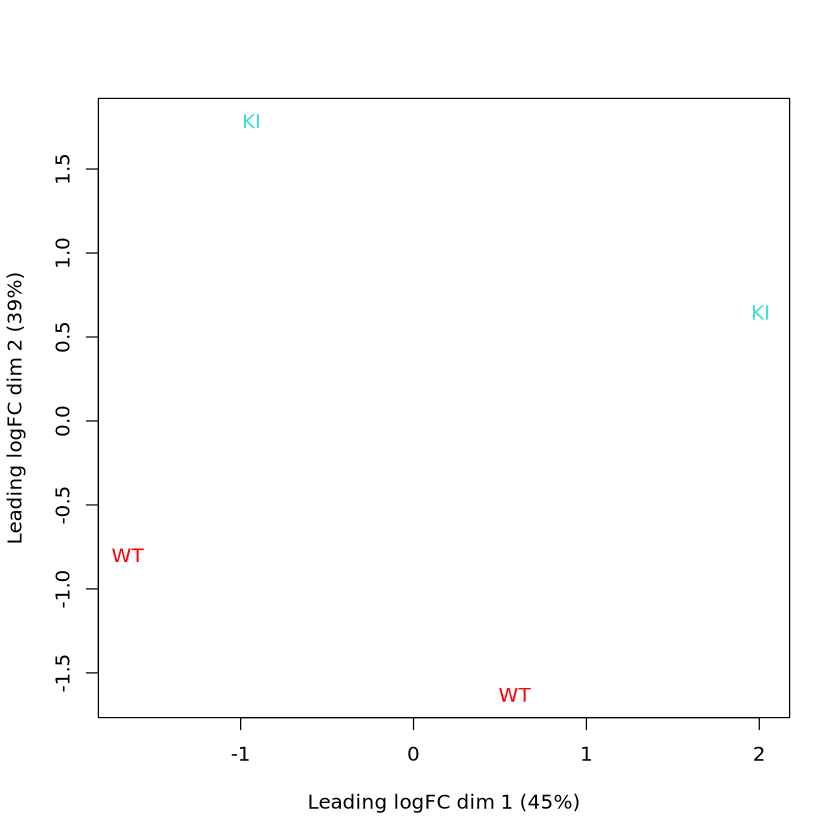

[1] "QL dispersion estimates for 1"


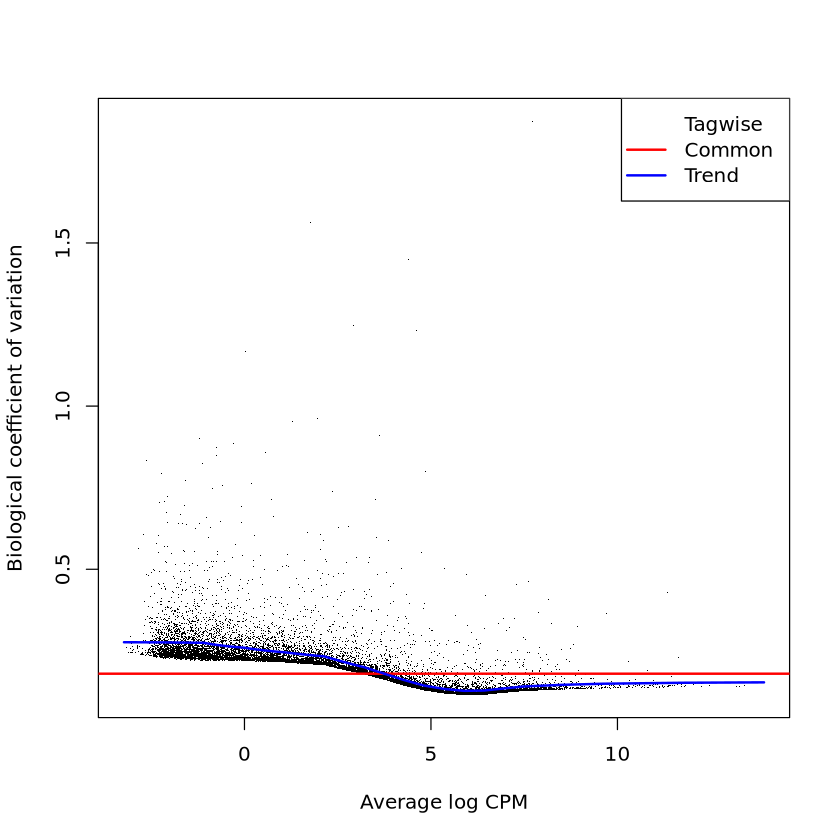

[1] "DE results for Cluster 1"
              Contrast Total  Up Down Ratio NotSig
1 1*groupKI -1*groupWT   643 420  223  1.88  19281
[1] "Processing Cluster 2 ..."
keep
FALSE  TRUE 
16587 16551 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_2    KI 33647418    1.0933665
ChiPSC12_WT_2               WT  9118294    0.9180056
HW8_ETV6_RUNX1_KI_2         KI 20972641    1.0199913
HW8_WT_2                    WT 12331413    0.9767703
[1] "MDS plot for Cluster 2"


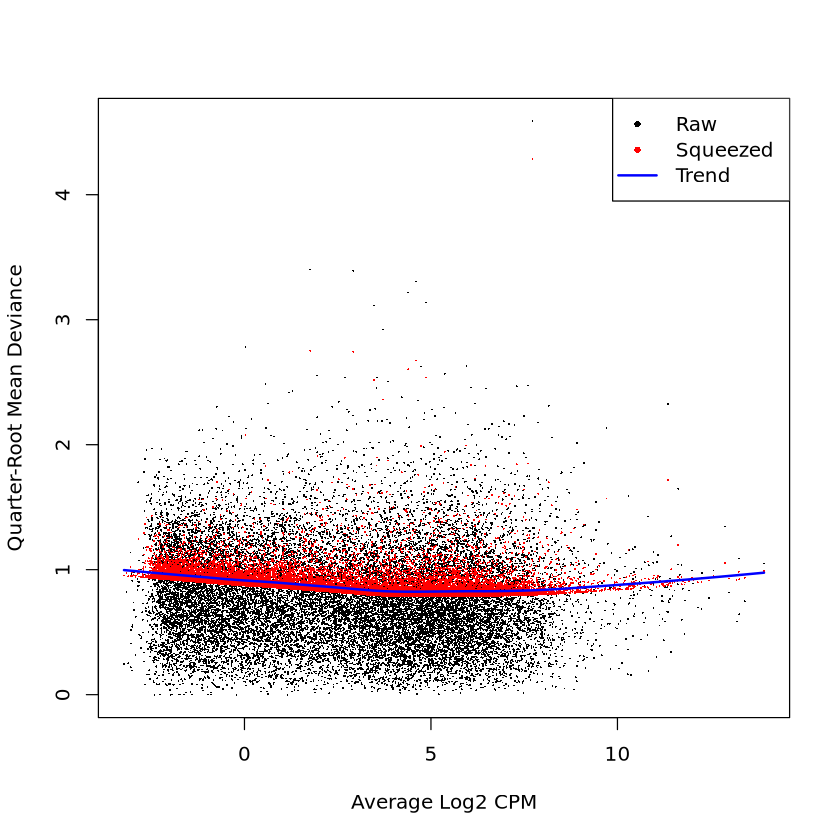

[1] "BCV plot for 2"


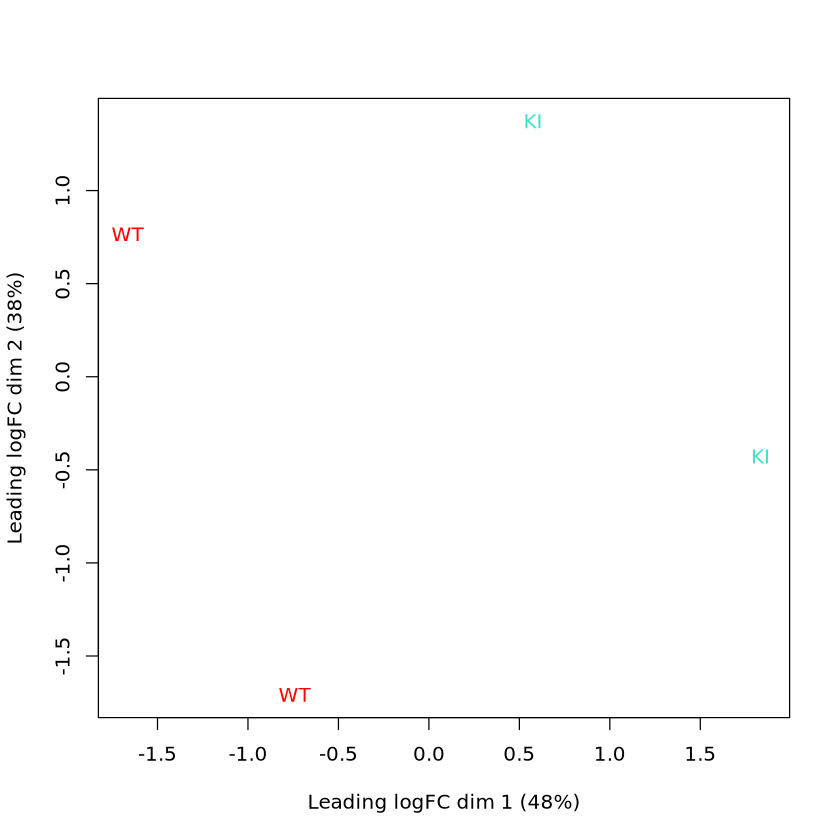

[1] "QL dispersion estimates for 2"


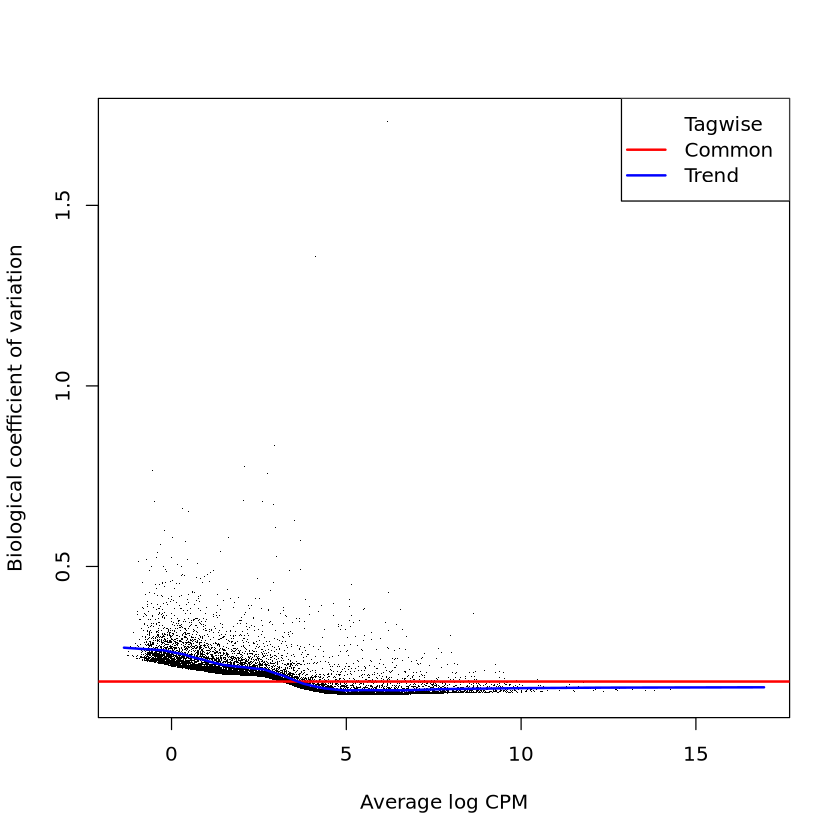

[1] "DE results for Cluster 2"
              Contrast Total  Up Down Ratio NotSig
1 1*groupKI -1*groupWT   905 472  433  1.09  15646
[1] "Processing Cluster 3 ..."
keep
FALSE  TRUE 
14461 18677 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_3    KI 49350447    1.0013067
ChiPSC12_WT_3               WT 18389836    0.9965042
HW8_ETV6_RUNX1_KI_3         KI 57060058    1.0187553
HW8_WT_3                    WT 13315532    0.9837481
[1] "MDS plot for Cluster 3"


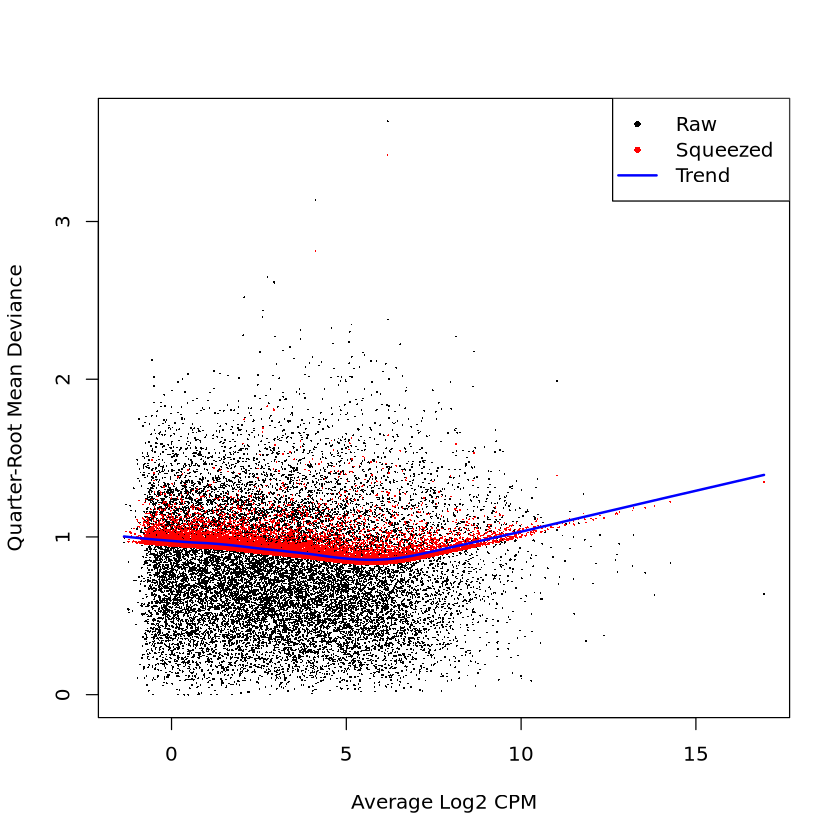

[1] "BCV plot for 3"


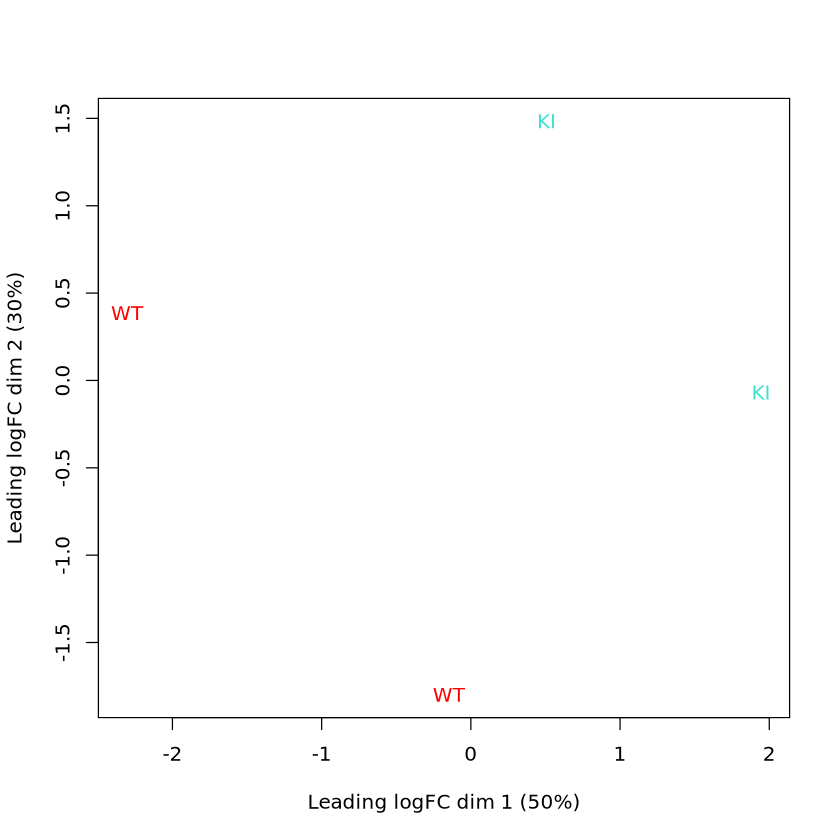

[1] "QL dispersion estimates for 3"


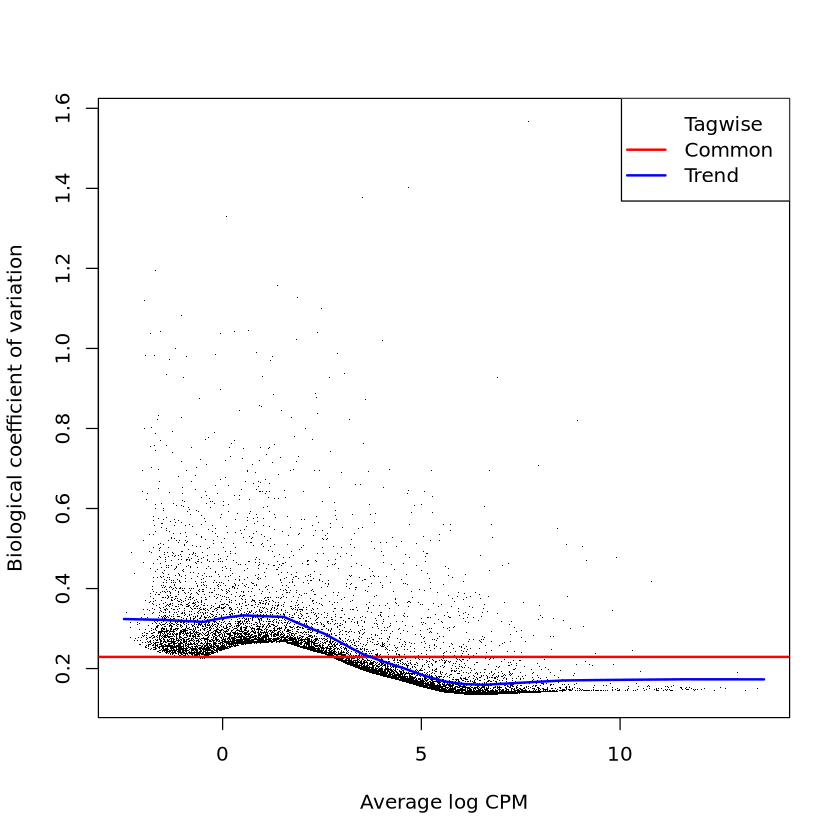

[1] "DE results for Cluster 3"
              Contrast Total Up Down Ratio NotSig
1 1*groupKI -1*groupWT     3  1    2   0.5  18674
[1] "Processing Cluster 4 ..."
keep
FALSE  TRUE 
16940 16198 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_4    KI 30090826    1.0118882
ChiPSC12_WT_4               WT  1733861    0.9799648
HW8_ETV6_RUNX1_KI_4         KI 25555020    0.9929104
HW8_WT_4                    WT  1113700    1.0156567
[1] "MDS plot for Cluster 4"


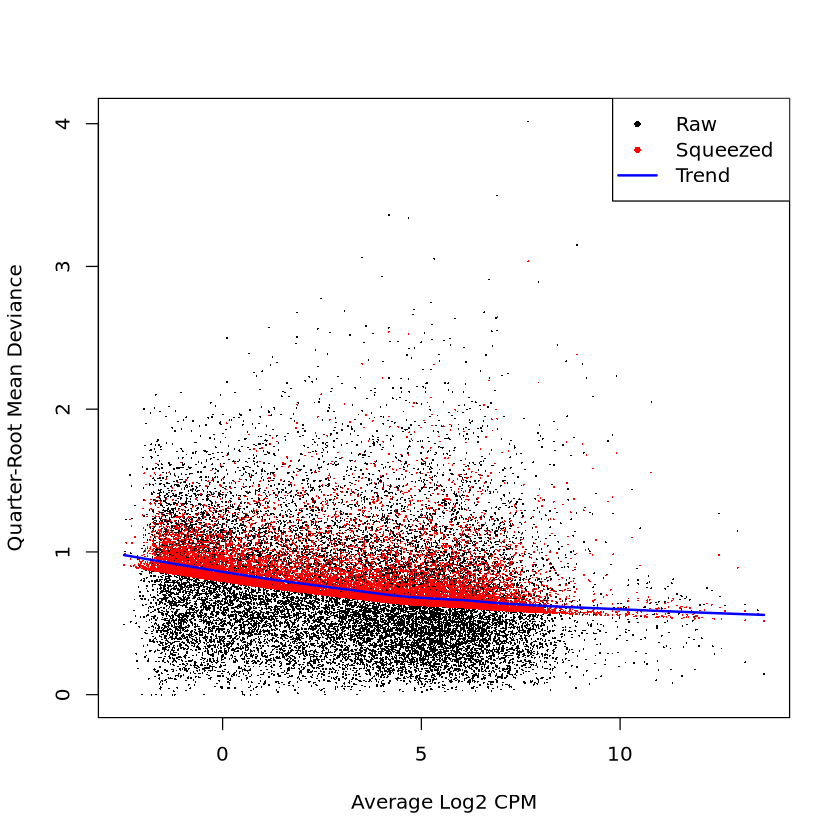

[1] "BCV plot for 4"


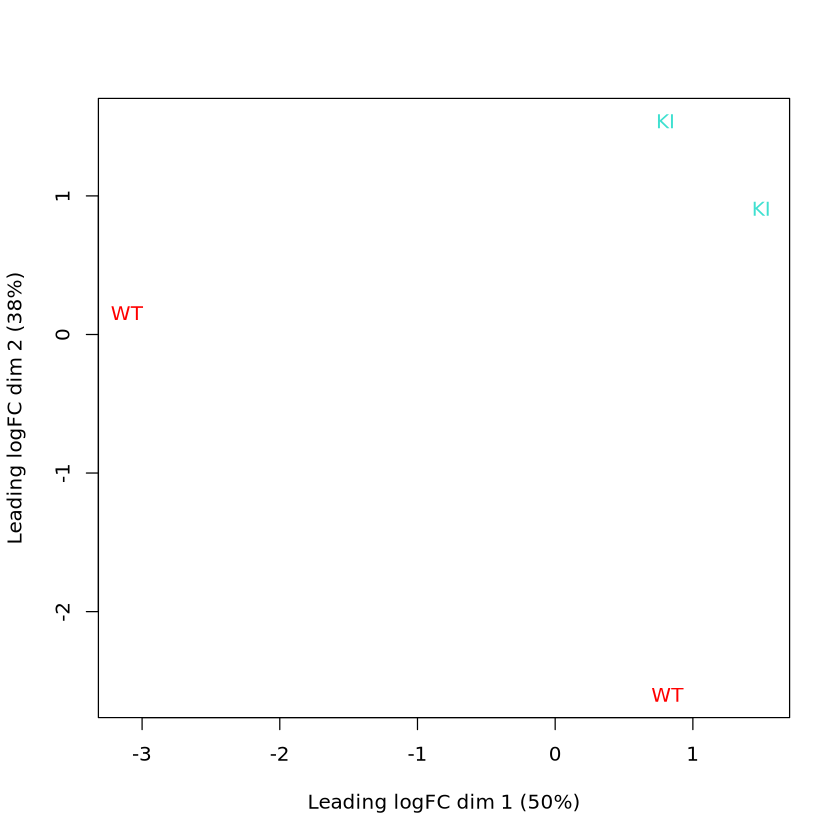

[1] "QL dispersion estimates for 4"


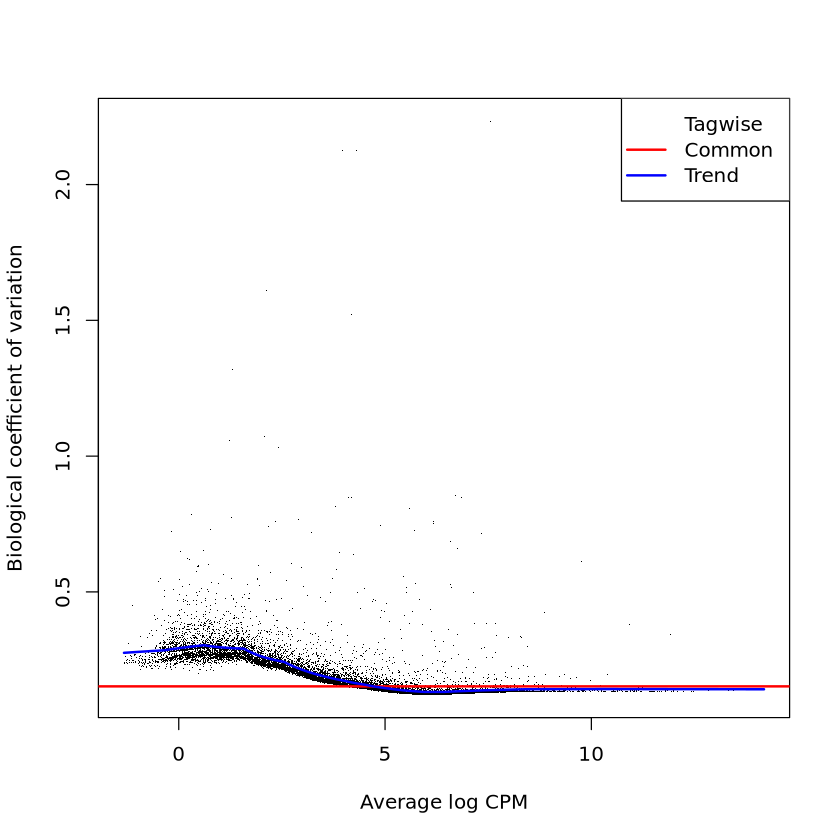

[1] "DE results for Cluster 4"
              Contrast Total  Up Down Ratio NotSig
1 1*groupKI -1*groupWT   223 141   82  1.72  15975
[1] "Processing Cluster 5 ..."
keep
FALSE  TRUE 
19209 13929 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_5    KI  8215132    1.0399992
ChiPSC12_WT_5               WT  1623367    0.9927464
HW8_ETV6_RUNX1_KI_5         KI 10748443    1.0114788
HW8_WT_5                    WT  1176725    0.9575730
[1] "MDS plot for Cluster 5"


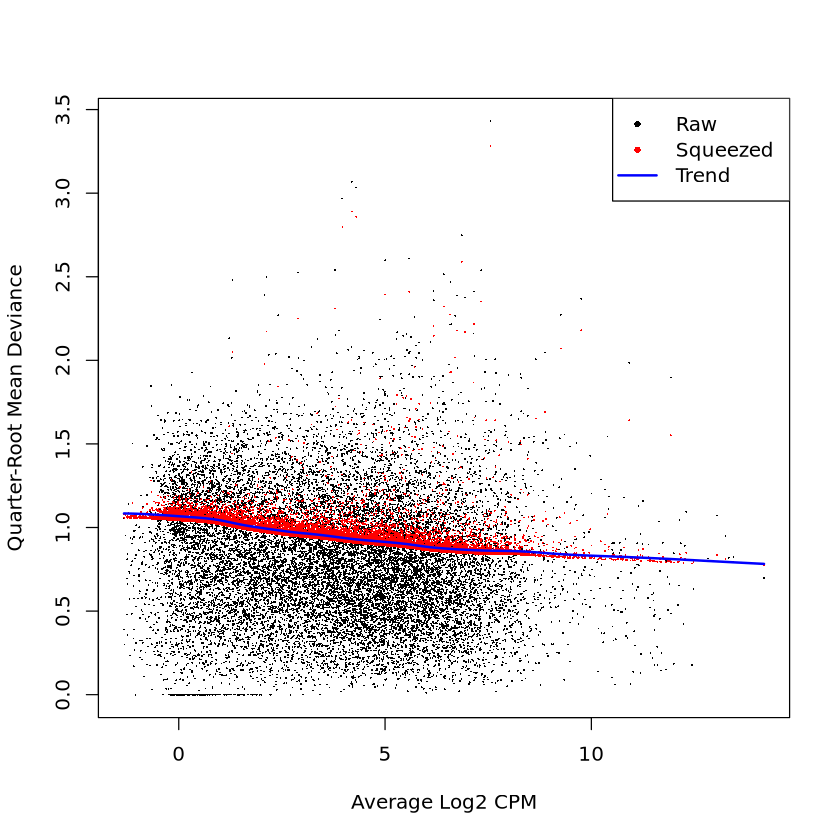

[1] "BCV plot for 5"


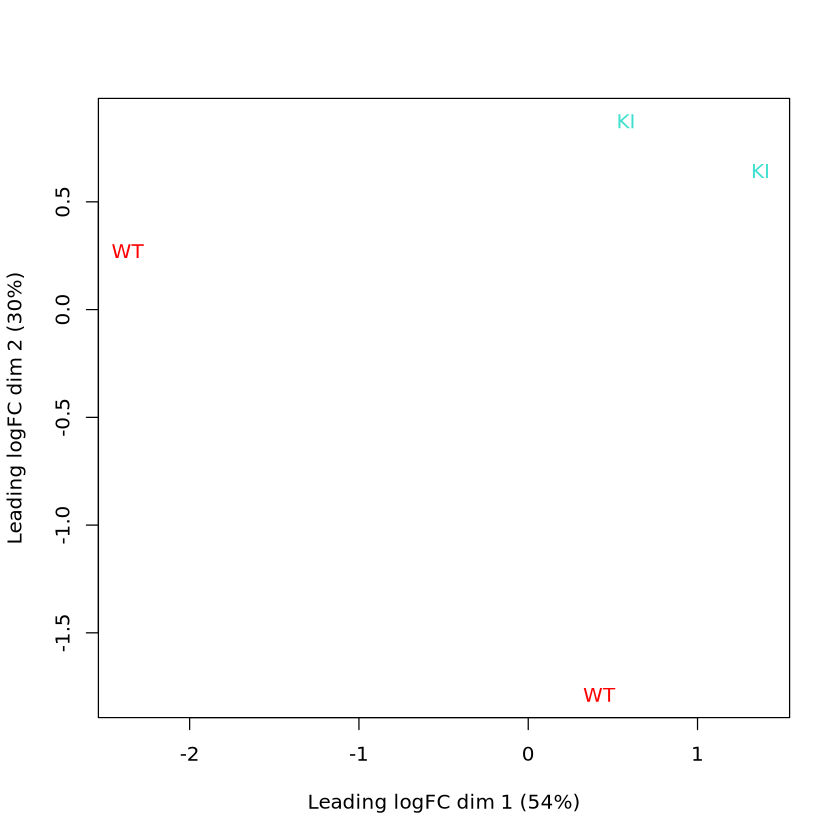

[1] "QL dispersion estimates for 5"


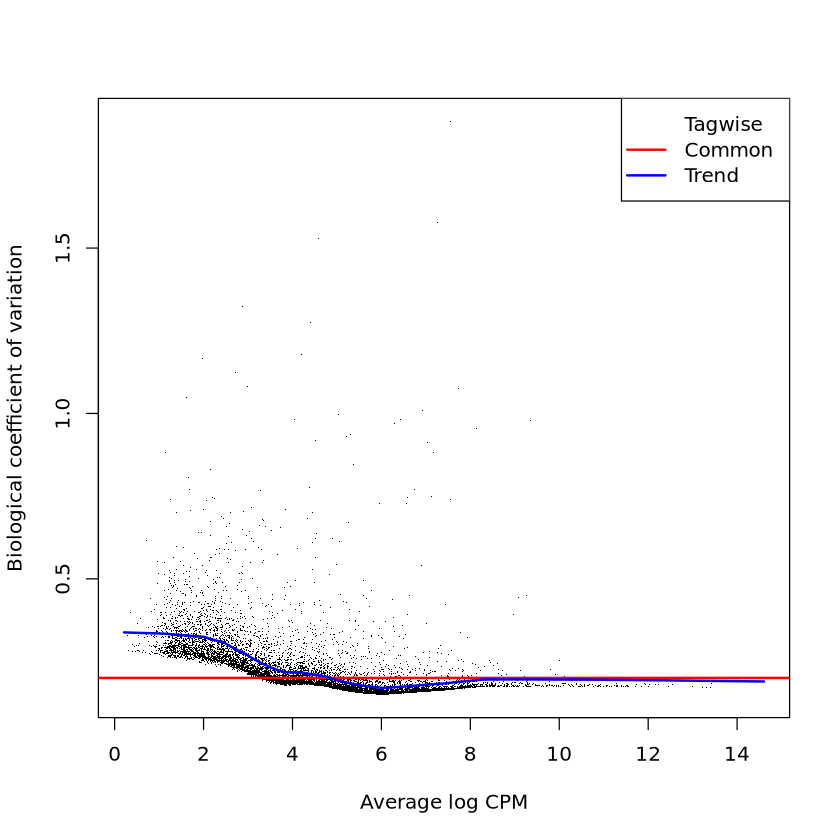

[1] "DE results for Cluster 5"
              Contrast Total Up Down Ratio NotSig
1 1*groupKI -1*groupWT    29  9   20  0.45  13900


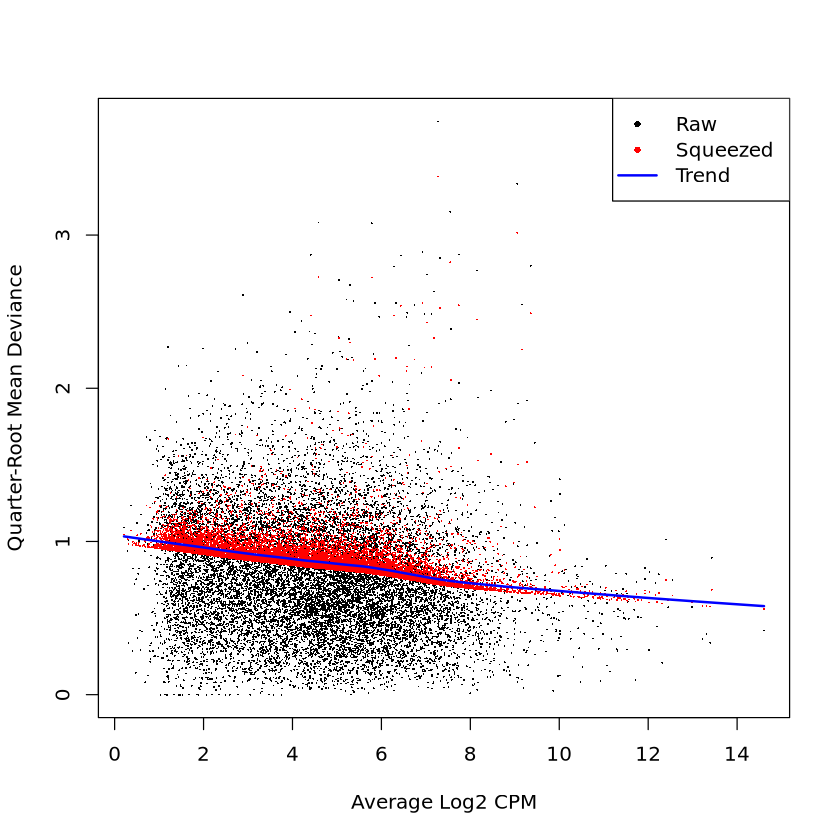

In [25]:
result_list <- list()
combined_results_sum <- data.frame()
combined_results_top <- data.frame()

for (cell_type in unique(ad$obs$cell_type)) {
    print(paste('Processing Cluster', cell_type, '...'))
    
    ad_select <- subset(ad, ad$obs$cell_type == cell_type)
    x_select <- t(ad_select$X)
    
    sampleinfo_select <- ad_select$obs %>%
    rename(sampletype = sample)%>%
    rownames_to_column("sample")

    sampleinfo_select$cell_type <- droplevels(sampleinfo_select$cell_type)
    sampleinfo_select$Group <- factor(sampleinfo_select$etv6_runx1)

    stopifnot(all(colnames(x_select) == sampleinfo_select$sample))
    
    y <- DGEList(counts = x_select, 
                 group = sampleinfo_select$Group, 
                 genes = rownames(x_select))
    
    keep <- filterByExpr(y)
    print(table(keep))
    y <- y[keep, , keep.lib.sizes = FALSE]
    
    y <- calcNormFactors(y, method = "TMM")
    print(head(y$samples))
    
    # MDS plot
    col.series <- c("turquoise", "red")[sampleinfo_select$Group]
    print(paste("MDS plot for Cluster", cell_type))
    plotMDS(y, 
            col = col.series, 
            cex = 1, 
            labels = sampleinfo_select$Group)
    
    # design matrix
    group <- sampleinfo_select$Group
    cell_line = sampleinfo_select$celline
    design <- model.matrix(~ 0 + group + cell_line) #cell_line not being factor of interest
    
    y <- estimateDisp(y, design, robust = TRUE)
    
    # BCV plot
    print(paste("BCV plot for", cell_type))
    plotBCV(y, cex = 0.1)
    
    # Fit the model
    fit <- glmQLFit(y, design, robust = TRUE)
    print(paste("QL dispersion estimates for", cell_type))
    plotQLDisp(fit)
    
    # Contrasts
    my.contrasts <- makeContrasts(
        KI_vs_WT = groupKI- groupWT,
        levels = colnames(design)
    )

    #----------------------
    tr_1 <- glmTreat(fit, contrast = my.contrasts[,"KI_vs_WT"], lfc = log2(1.5))
    
    sumTr_1 <- summary(decideTests(tr_1, method = "separate", adjust.method = "BH", p.value = 0.1, lfc = 0))
    
    sumTr005 <- cbind(sumTr_1) %>% t()
    sumTr005 <- as.data.frame(sumTr005)
    
    sumTr005$Total <- (sumTr005$Up + sumTr005$Down)
    sumTr005$Ratio <- (sumTr005$Up / sumTr005$Down)
    
    sumTr005[, c(2:5)] <- sapply(sumTr005[, c(2:5)], as.numeric)
    sumTr005 <- sumTr005 %>% mutate(across(everything(), round, 2))
    
    col_order <- c("Total", "Up", "Down", "Ratio", "NotSig")
    sumTr005 <- sumTr005[, col_order]
    sumTr005 <- sumTr005 %>% rownames_to_column("Contrast")
    
    print(paste("DE results for Cluster", cell_type))
    print(sumTr005)
    
    # Store individual results in the list
    result_list[[cell_type]] <- sumTr005
    combined_results_sum <- bind_rows(combined_results_sum, mutate(sumTr005, 
                                                                   cell_type = cell_type))

    result_list[[cell_type]] <- list(
        KIvsWT = data.frame(topTags(tr_1, 
                                    n = Inf, 
                                    sort.by = "none", 
                                    adjust.method = "BH"))
    )

    combined_results_top <- bind_rows(combined_results_top, 
                                      mutate(result_list[[cell_type]]$KIvsWT, 
                                             cell_type = cell_type, 
                                             Contrast = "KI_vs_WT"))
}


In [26]:
combined_results_sum

Contrast,Total,Up,Down,Ratio,NotSig,cell_type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1*groupKI -1*groupWT,577,399,178,2.24,19734,0
1*groupKI -1*groupWT,643,420,223,1.88,19281,1
1*groupKI -1*groupWT,905,472,433,1.09,15646,2
1*groupKI -1*groupWT,3,1,2,0.50,18674,3
1*groupKI -1*groupWT,223,141,82,1.72,15975,4
1*groupKI -1*groupWT,29,9,20,0.45,13900,5


## same for FC>2

To use filterByExpr correctly, you have to give it the design matrix or group as an argument:
https://support.bioconductor.org/p/127737/
If you don't specify the groups at all, then filterByExpr will think that all samples are one group and will end up doing too much filtering.

[1] "Processing Cluster 0 ..."
keep
FALSE  TRUE 
12827 20311 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_0    KI 99440035    1.0198268
ChiPSC12_WT_0               WT 42640077    0.9565463
HW8_ETV6_RUNX1_KI_0         KI 67186628    1.0150111
HW8_WT_0                    WT 57096565    1.0099428
[1] "MDS plot for Cluster 0"
[1] "BCV plot for 0"


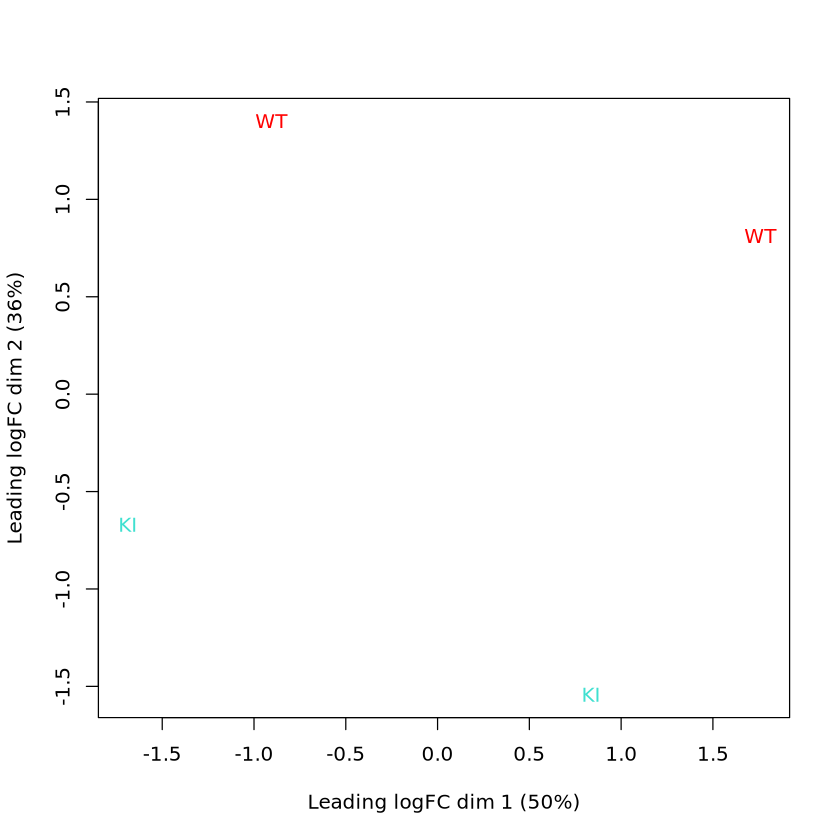

[1] "QL dispersion estimates for 0"


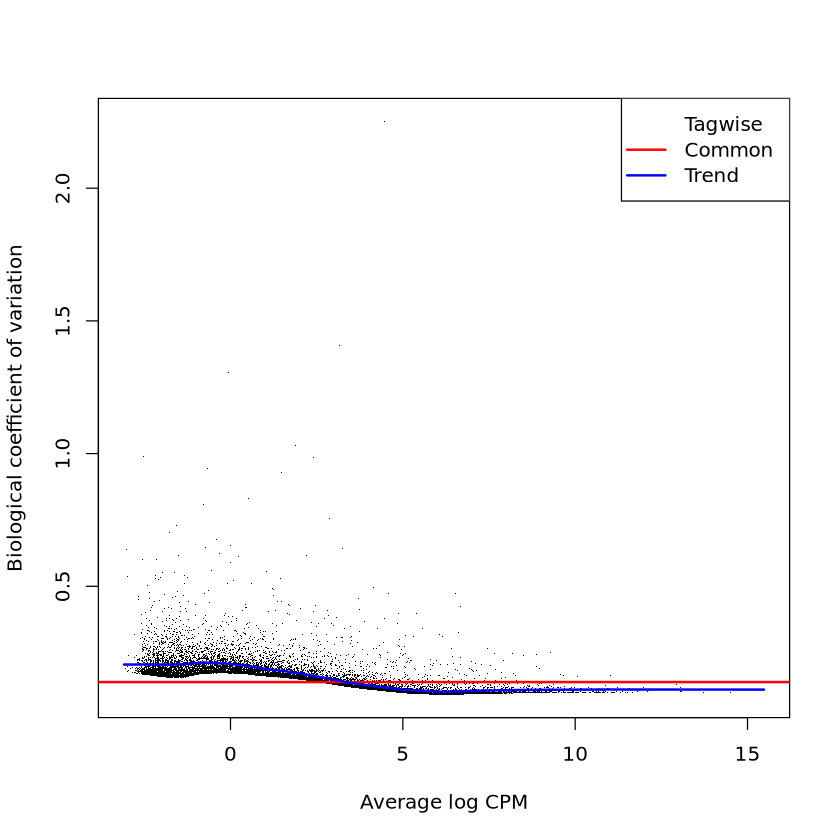

[1] "DE results for Cluster 0"
              Contrast Total  Up Down Ratio NotSig
1 1*groupKI -1*groupWT   174 136   38  3.58  20137
[1] "Processing Cluster 1 ..."
keep
FALSE  TRUE 
13214 19924 
                         group  lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_1    KI  19379706    1.0419048
ChiPSC12_WT_1               WT 101075675    0.9567824
HW8_ETV6_RUNX1_KI_1         KI  23642154    1.0279305
HW8_WT_1                    WT  88887766    0.9758768
[1] "MDS plot for Cluster 1"


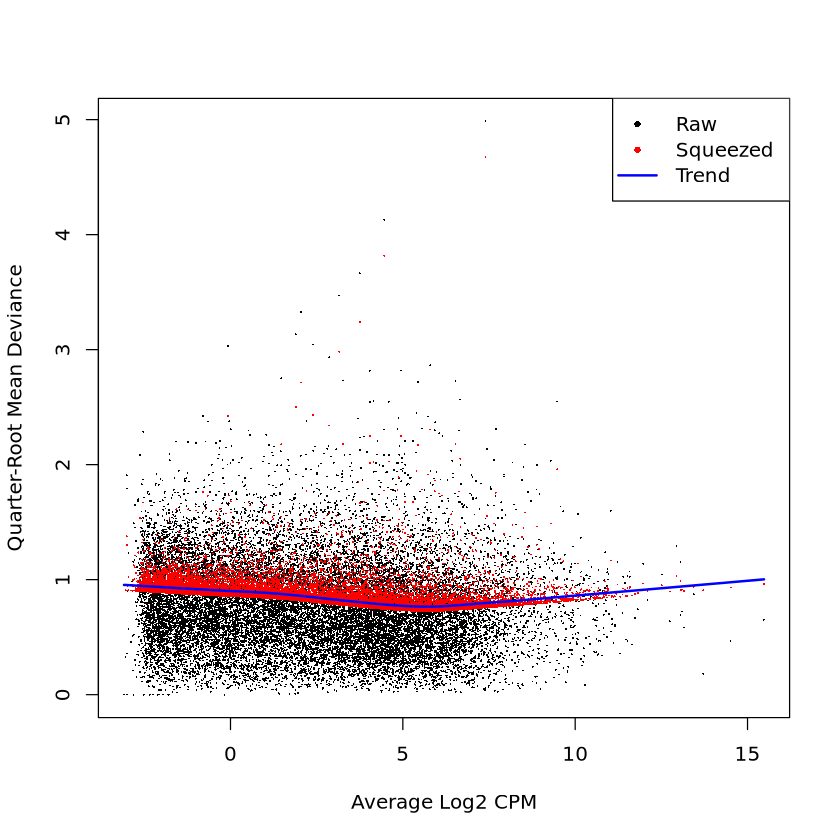

[1] "BCV plot for 1"


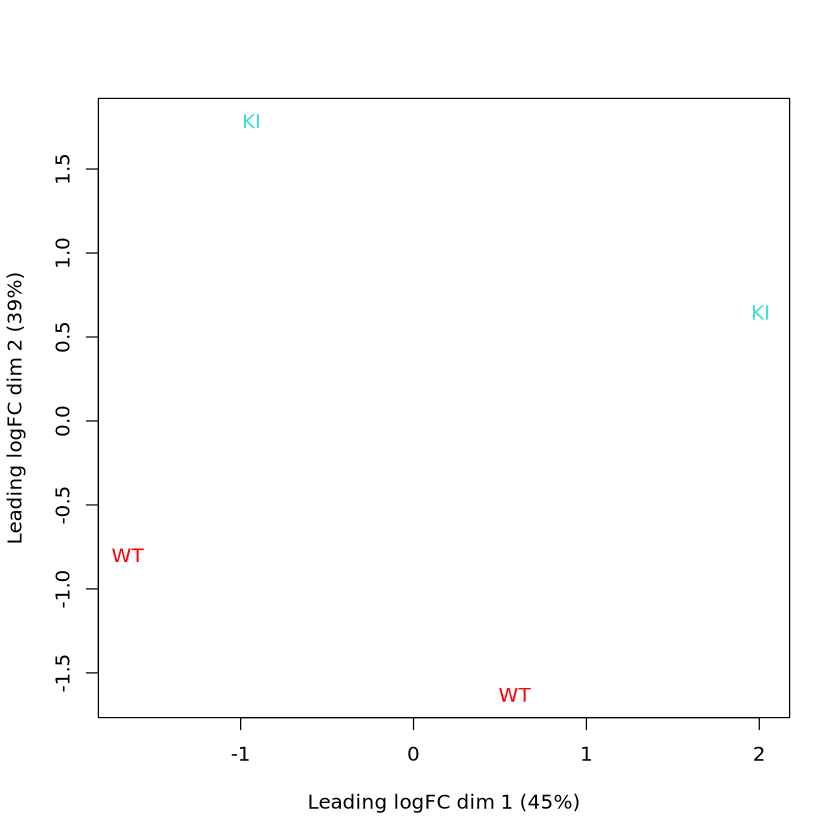

[1] "QL dispersion estimates for 1"


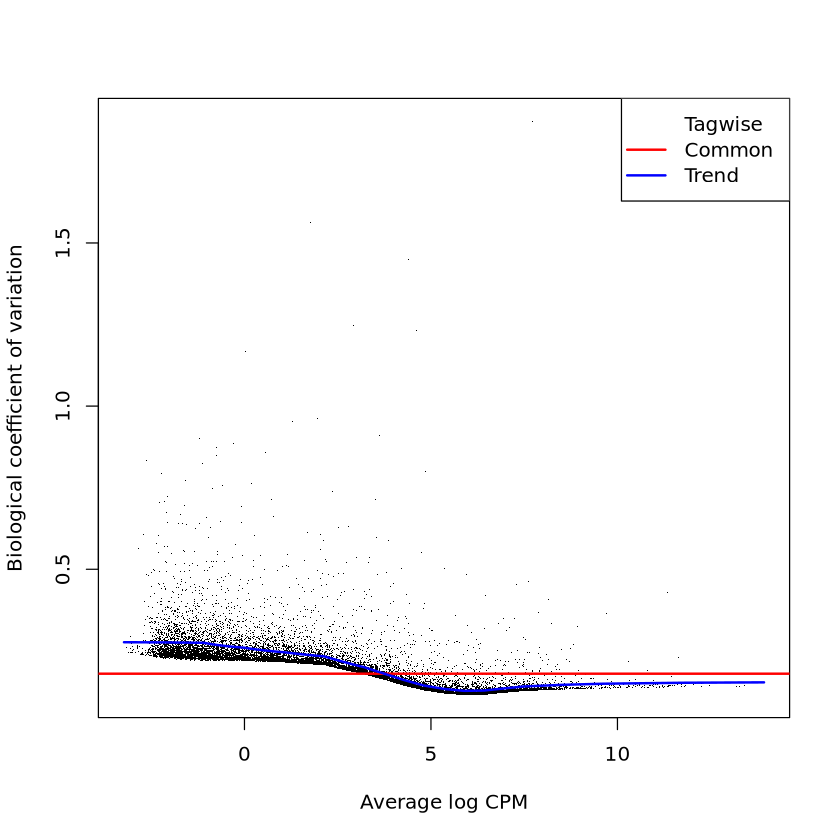

[1] "DE results for Cluster 1"
              Contrast Total  Up Down Ratio NotSig
1 1*groupKI -1*groupWT   217 143   74  1.93  19707
[1] "Processing Cluster 2 ..."
keep
FALSE  TRUE 
16587 16551 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_2    KI 33647418    1.0933665
ChiPSC12_WT_2               WT  9118294    0.9180056
HW8_ETV6_RUNX1_KI_2         KI 20972641    1.0199913
HW8_WT_2                    WT 12331413    0.9767703
[1] "MDS plot for Cluster 2"


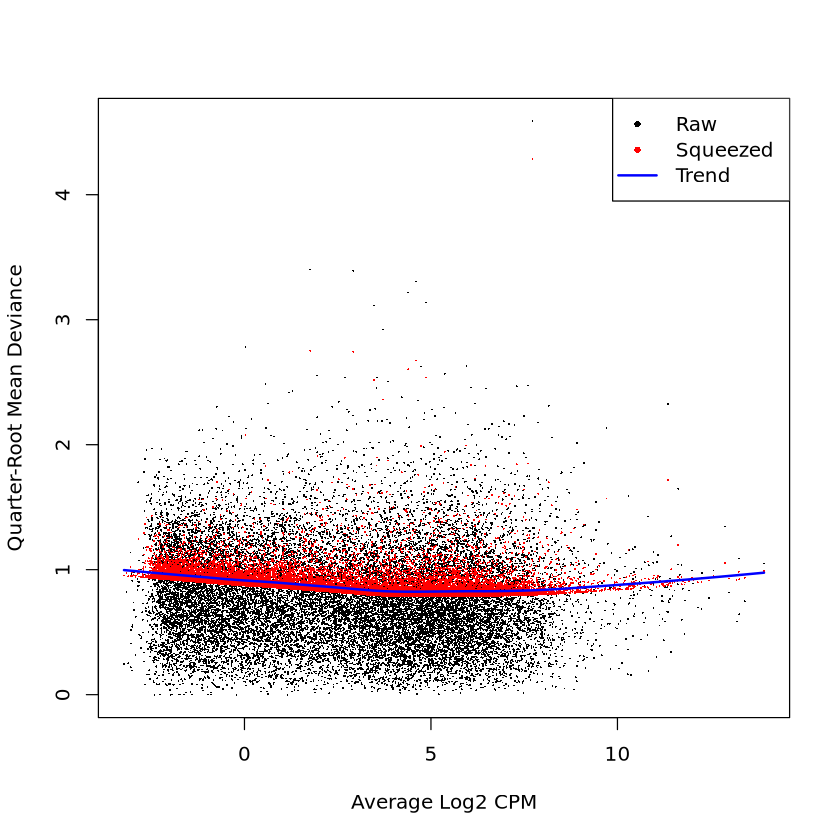

[1] "BCV plot for 2"


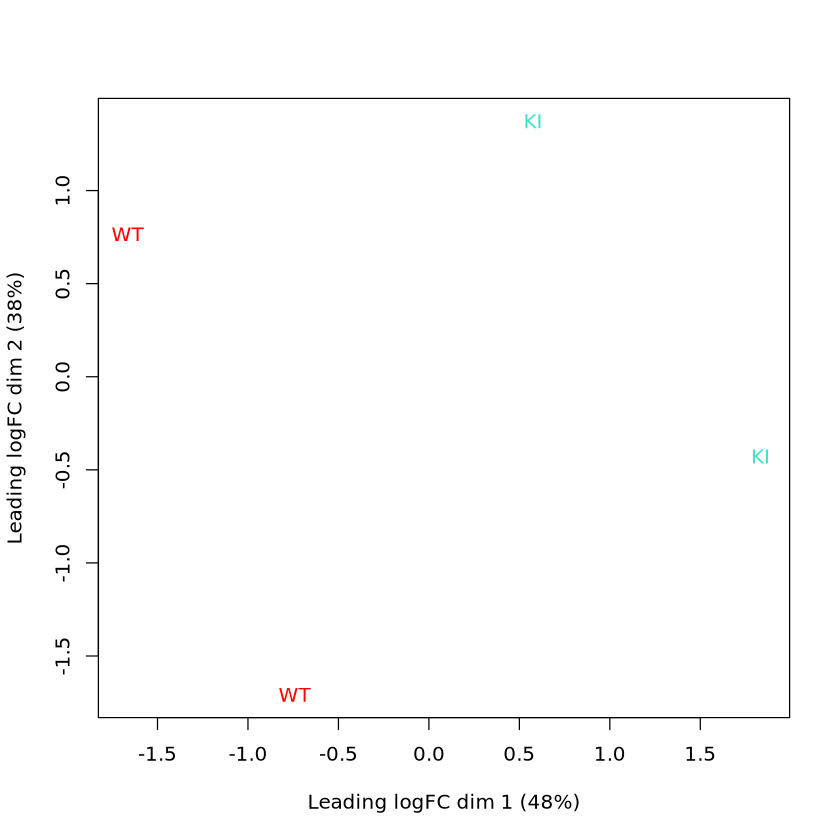

[1] "QL dispersion estimates for 2"


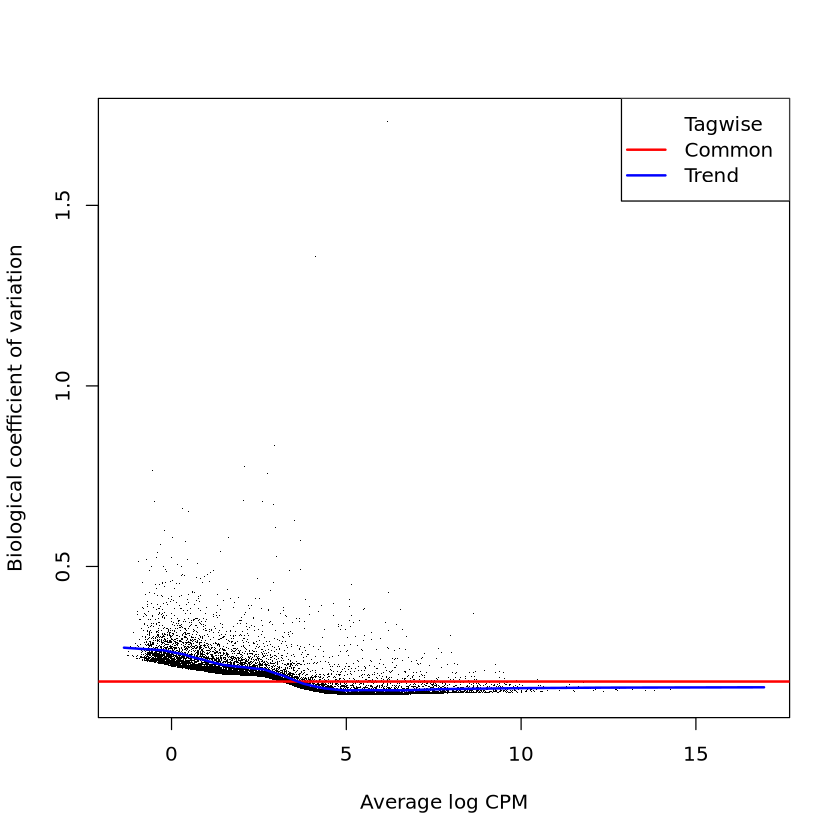

[1] "DE results for Cluster 2"
              Contrast Total  Up Down Ratio NotSig
1 1*groupKI -1*groupWT   343 195  148  1.32  16208
[1] "Processing Cluster 3 ..."
keep
FALSE  TRUE 
14461 18677 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_3    KI 49350447    1.0013067
ChiPSC12_WT_3               WT 18389836    0.9965042
HW8_ETV6_RUNX1_KI_3         KI 57060058    1.0187553
HW8_WT_3                    WT 13315532    0.9837481
[1] "MDS plot for Cluster 3"


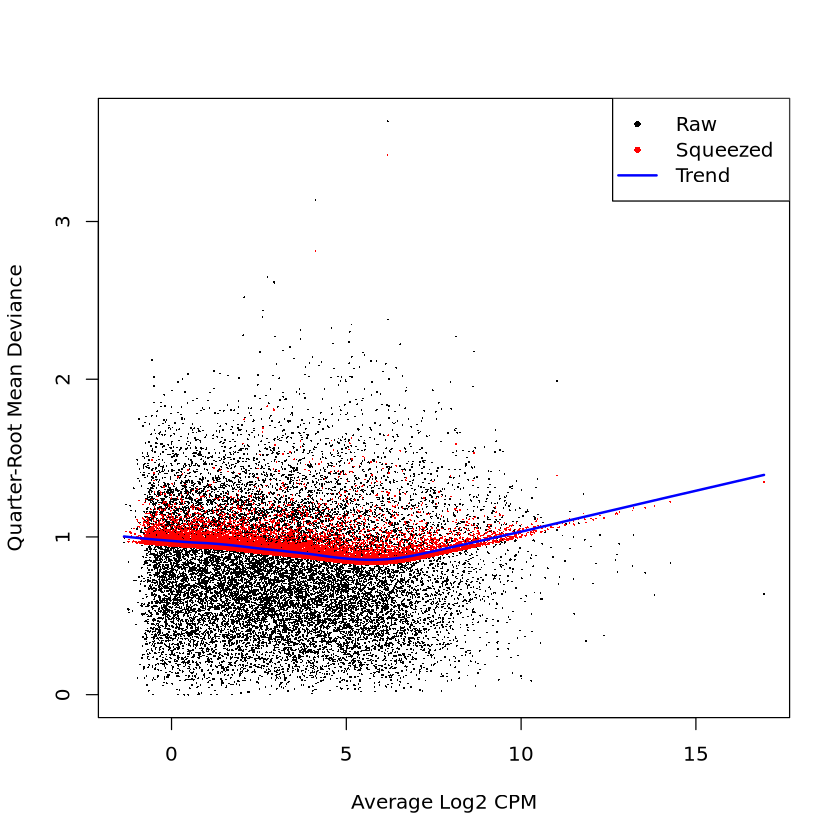

[1] "BCV plot for 3"


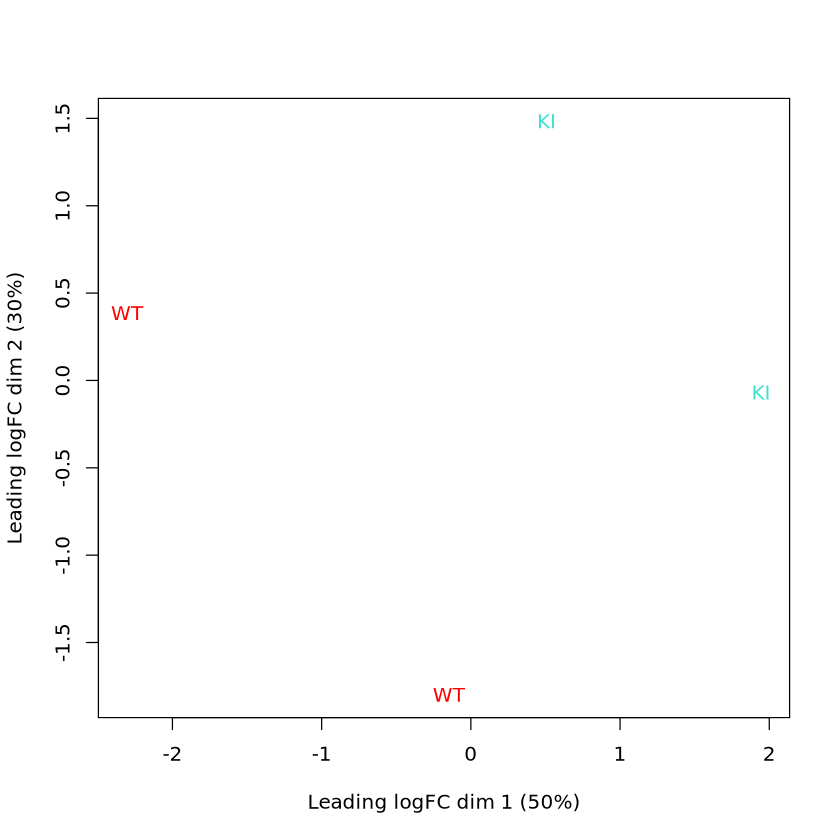

[1] "QL dispersion estimates for 3"


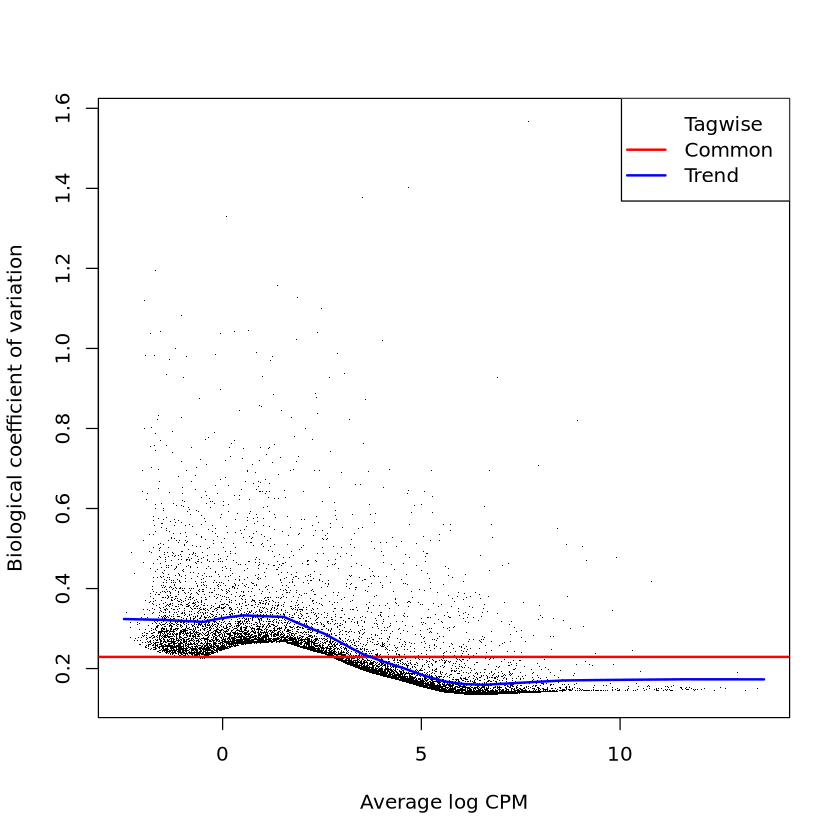

[1] "DE results for Cluster 3"
              Contrast Total Up Down Ratio NotSig
1 1*groupKI -1*groupWT     3  1    2   0.5  18674
[1] "Processing Cluster 4 ..."
keep
FALSE  TRUE 
16940 16198 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_4    KI 30090826    1.0118882
ChiPSC12_WT_4               WT  1733861    0.9799648
HW8_ETV6_RUNX1_KI_4         KI 25555020    0.9929104
HW8_WT_4                    WT  1113700    1.0156567
[1] "MDS plot for Cluster 4"


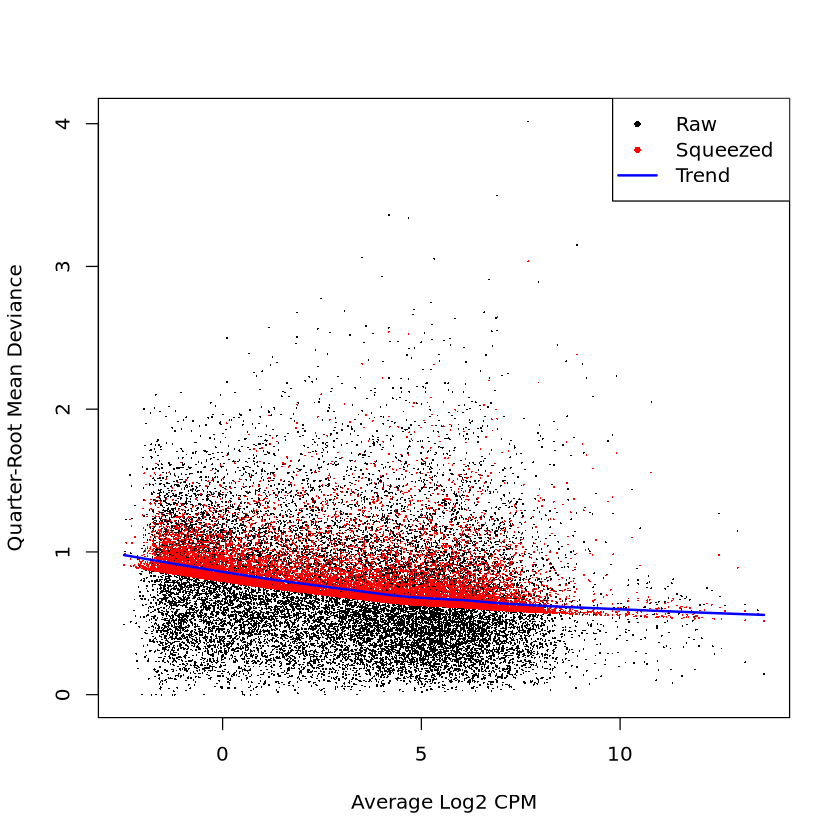

[1] "BCV plot for 4"


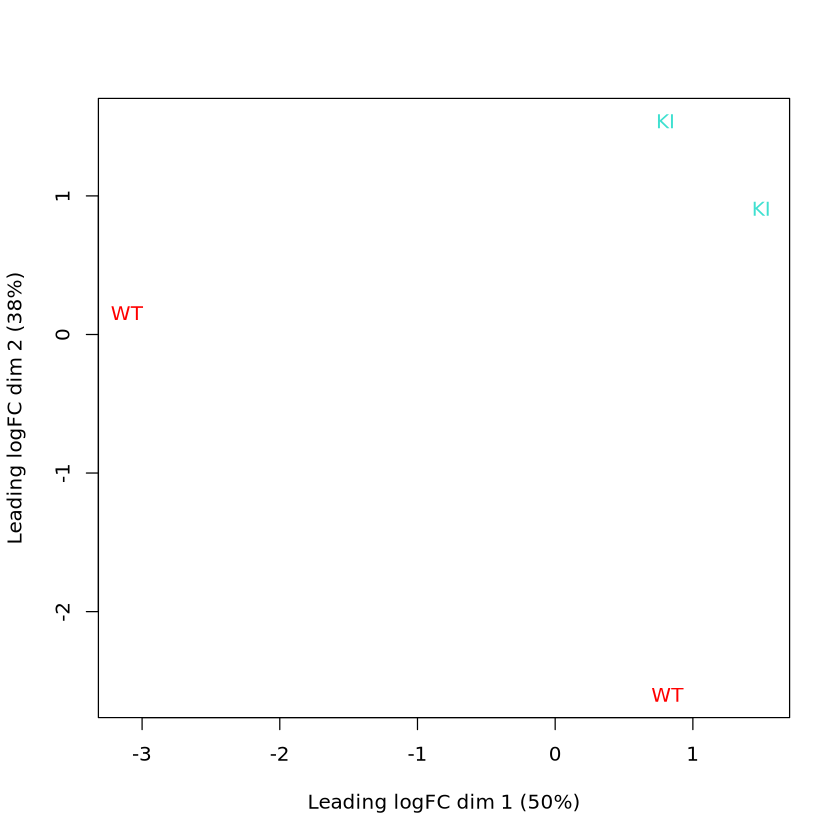

[1] "QL dispersion estimates for 4"


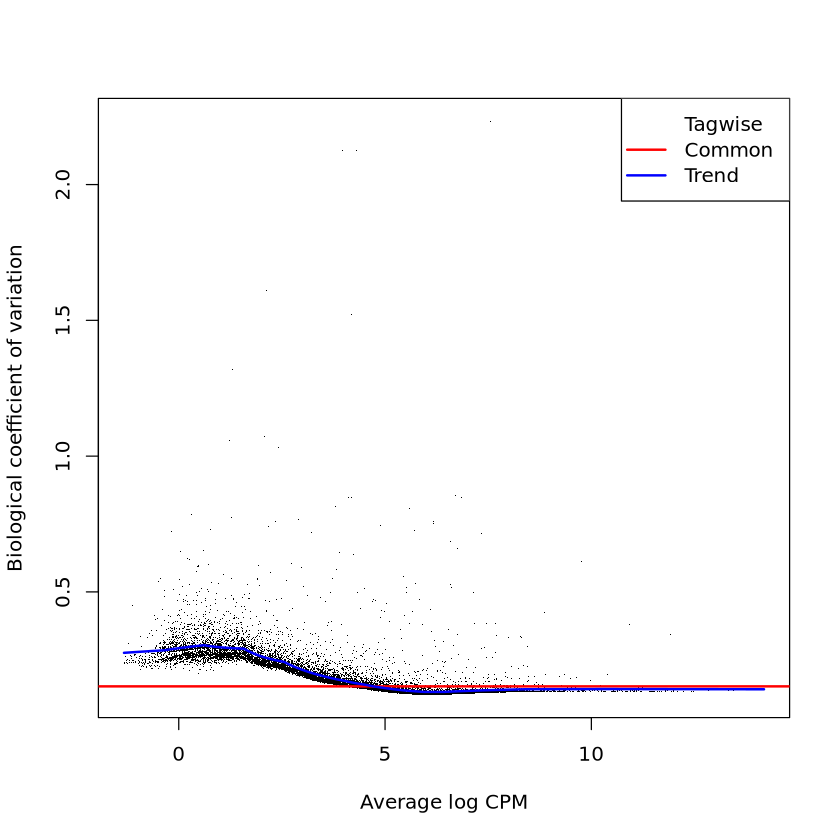

[1] "DE results for Cluster 4"
              Contrast Total Up Down Ratio NotSig
1 1*groupKI -1*groupWT    84 49   35   1.4  16114
[1] "Processing Cluster 5 ..."
keep
FALSE  TRUE 
19209 13929 
                         group lib.size norm.factors
ChiPSC12_ETV6_RUNX1_KI_5    KI  8215132    1.0399992
ChiPSC12_WT_5               WT  1623367    0.9927464
HW8_ETV6_RUNX1_KI_5         KI 10748443    1.0114788
HW8_WT_5                    WT  1176725    0.9575730
[1] "MDS plot for Cluster 5"


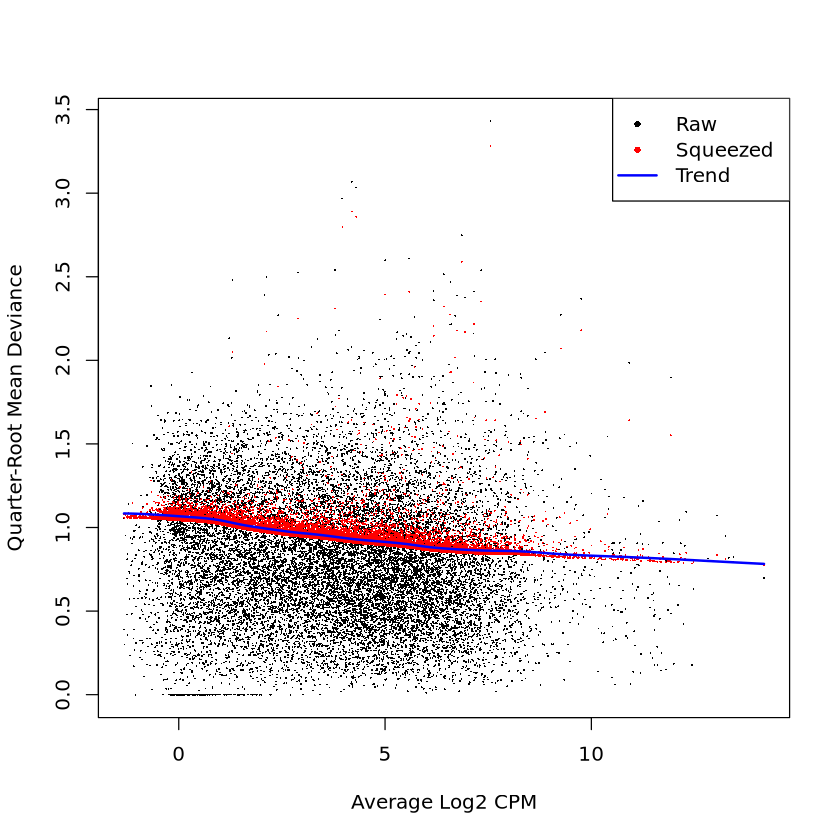

[1] "BCV plot for 5"


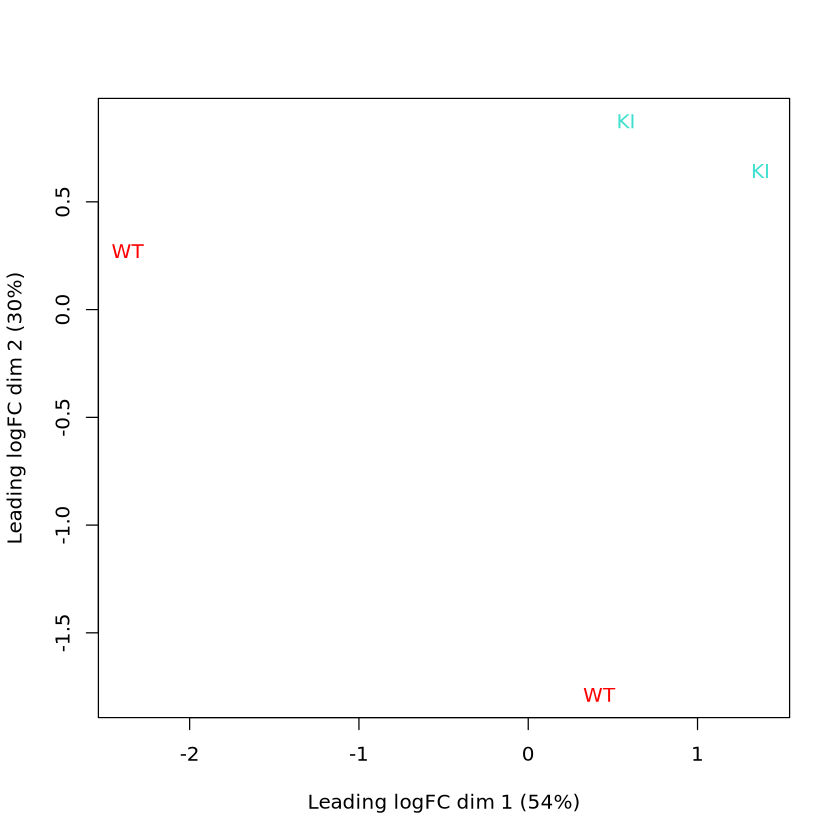

[1] "QL dispersion estimates for 5"


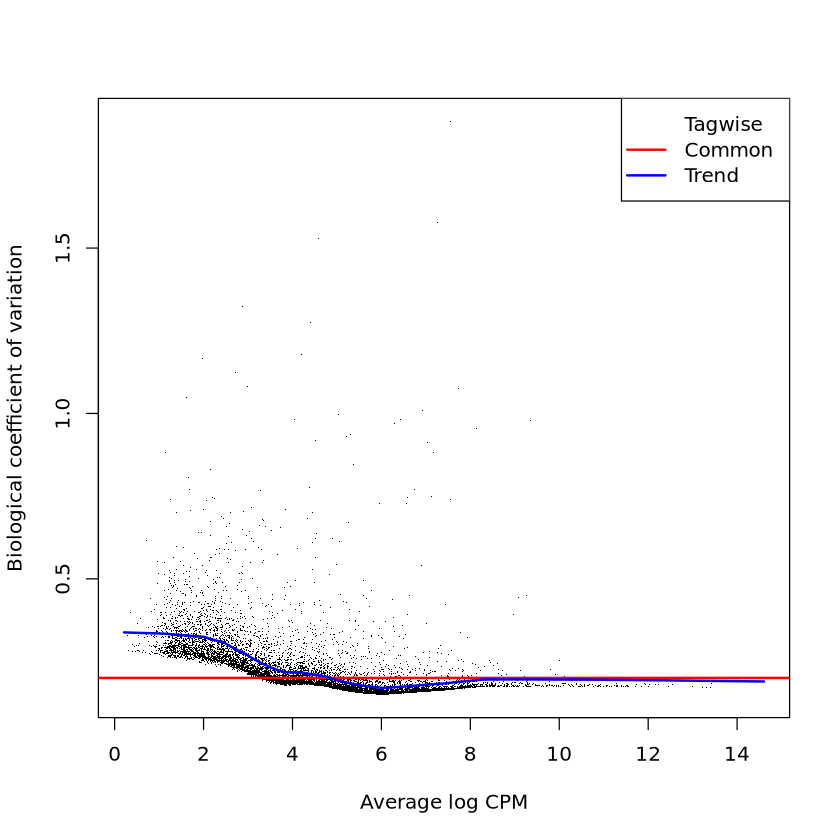

[1] "DE results for Cluster 5"
              Contrast Total Up Down Ratio NotSig
1 1*groupKI -1*groupWT    12  5    7  0.71  13917


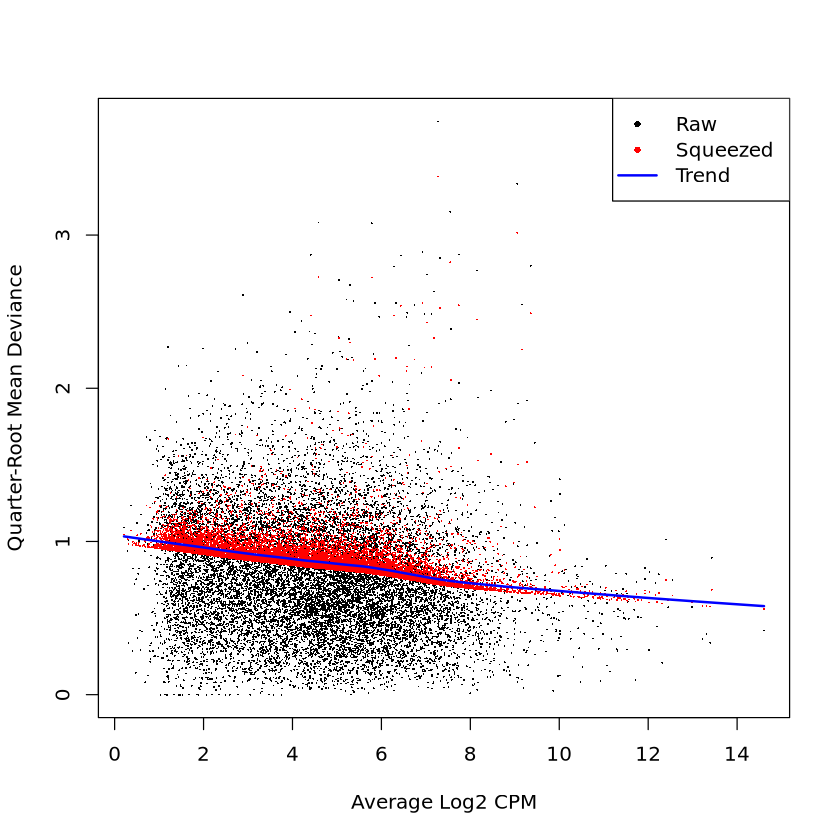

In [29]:
result_list <- list()
combined_results_sum <- data.frame()
combined_results_top <- data.frame()

for (cell_type in unique(ad$obs$cell_type)) {
    print(paste('Processing Cluster', cell_type, '...'))

    ad_select <- subset(ad, ad$obs$cell_type == cell_type)

    x_select <- t(ad_select$X)
    
    sampleinfo_select <- ad_select$obs %>%
    rename(sampletype = sample)%>%
    rownames_to_column("sample")

    sampleinfo_select$cell_type <- droplevels(sampleinfo_select$cell_type)
    sampleinfo_select$Group <- factor(sampleinfo_select$etv6_runx1)

    stopifnot(all(colnames(x_select) == sampleinfo_select$sample))

    y <- DGEList(counts = x_select, 
                 group = sampleinfo_select$Group, 
                 genes = rownames(x_select))
    
   #--------------------
    keep <- filterByExpr(y, group = group)
    print(table(keep))
    y <- y[keep, , keep.lib.sizes = FALSE]
    
    y <- calcNormFactors(y, method = "TMM")
    print(head(y$samples))
    #--------------------
    # MDS
    col.series <- c("turquoise", "red")[sampleinfo_select$Group]
    print(paste("MDS plot for Cluster", cell_type))
    plotMDS(y, 
            col = col.series, 
            cex = 1, 
            labels = sampleinfo_select$Group)
    
    # design matrix
    group <- sampleinfo_select$Group
    cell_line = sampleinfo_select$celline
    design <- model.matrix(~ 0 + group + cell_line) #cell_line not being factor of interest
    
    y <- estimateDisp(y, design, robust = TRUE)

    print(paste("BCV plot for", cell_type))
    plotBCV(y, cex = 0.1)

    fit <- glmQLFit(y, design, robust = TRUE)
    print(paste("QL dispersion estimates for", cell_type))
    plotQLDisp(fit)
    
    # Contrasts
    my.contrasts <- makeContrasts(
        KI_vs_WT = groupKI- groupWT,
        levels = colnames(design)
    )
    #-------------------------
    tr_1 <- glmTreat(fit, contrast = my.contrasts[,"KI_vs_WT"], 
                     lfc = log2(2))
    sumTr_1 <- summary(decideTests(tr_1, method = "separate", adjust.method = "BH", 
                                   p.value = 0.1, lfc = 0))
    
    sumTr005 <- cbind(sumTr_1) %>% t()
    sumTr005 <- as.data.frame(sumTr005)
    
    sumTr005$Total <- (sumTr005$Up + sumTr005$Down)
    sumTr005$Ratio <- (sumTr005$Up / sumTr005$Down)
    
    sumTr005[, c(2:5)] <- sapply(sumTr005[, c(2:5)], as.numeric)
    sumTr005 <- sumTr005 %>% mutate(across(everything(), round, 2))
    
    col_order <- c("Total", "Up", "Down", "Ratio", "NotSig")
    sumTr005 <- sumTr005[, col_order]
    sumTr005 <- sumTr005 %>% rownames_to_column("Contrast")
    
    print(paste("DE results for Cluster", cell_type))
    print(sumTr005)

    result_list[[cell_type]] <- sumTr005

    combined_results_sum <- bind_rows(combined_results_sum, mutate(sumTr005, 
                                                                   cell_type = cell_type))

    result_list[[cell_type]] <- list(
        KIvsWT = data.frame(topTags(tr_1, 
                                    n = Inf, 
                                    sort.by = "none", 
                                    adjust.method = "BH"))
    )
    
    combined_results_top <- bind_rows(combined_results_top, 
                                      mutate(result_list[[cell_type]]$KIvsWT, 
                                             cell_type = cell_type, 
                                             Contrast = "KI_vs_WT"))
}


In [33]:
combined_results_top_FDR01 = combined_results_top %>%
filter (.,FDR < 0.1)

In [36]:
head(combined_results_top_FDR01)

,genes,logFC,unshrunk.logFC,logCPM,PValue,FDR,cell_type,Contrast
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ABCA1,ABCA1,1.846690,1.847642,2.3639813,0.0008186947,0.09763467,0,KI_vs_WT
ABCB11,ABCB11,3.882355,3.887462,2.0621094,0.0001387232,0.03643775,0,KI_vs_WT
AC011997.2...3,AC011997.2,2.186761,2.187596,3.4805907,0.0002759915,0.05190429,0,KI_vs_WT
AC016168.4...4,AC016168.4,-2.922778,-2.926008,1.6697629,0.0001540365,0.03960299,0,KI_vs_WT
AC016583.2...5,AC016583.2,3.475542,3.497171,-0.2237194,0.0005680999,0.07957708,0,KI_vs_WT
AC016598.2...6,AC016598.2,5.301601,5.386991,-0.5241745,0.0002495891,0.04998562,0,KI_vs_WT


In [37]:
write.table(combined_results_top_FDR01,
           "./data/DE_glmTreat_FC2_FDR_10pct_percluster.txt",
            row.names=FALSE,sep="\t", 
            quote = FALSE)


In [90]:
write.table(combined_results_sum,
           "./data/DE_glmTreat_FC2_FDR_10pct_percluster-SUMMARY.txt",
            row.names=FALSE,sep="\t", 
            quote = FALSE)


## Visualising normalized counts - without filtering genes

In [1]:
library(tidyverse)
library(data.table)
library(matrixStats)
library(ggplot2)
library(anndata)
library(edgeR)
library(scales)
library(knitr)

#to be able to adjust figs
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘anndata’


The foll

In [2]:
ad = read_h5ad("/research/groups/sysgen/PROJECTS/sysgen_team/andrea_work/2023_Fischer_iPSC/revision_final/data/adata2_leiden_FS_pbulk.h5ad")

x = t(ad$X)
head(x, n=2)

ad$obs$cell_type =  as.factor(ad$obs$leiden_res0_25)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
A1BG,2993,1477,1863,1929,262,1041,326,884,836,243,⋯,1321,455,712,45,648,33,171,45,235,30
A1BG-AS1,482,216,237,244,58,264,57,206,132,28,⋯,167,76,154,5,97,7,39,4,22,11


In [3]:
sampleinfo = ad$obs %>%
rename(sampletype = sample)%>%
rownames_to_column("sample") 

head(sampleinfo, n=3)

,sample,sampletype,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts,cell_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072,0
2,ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232,0
3,HW8_ETV6_RUNX1_KI_0,HW8_ETV6_RUNX1_KI,KI,HW8,0,3040,67216960,0


In [4]:
table(colnames(x)==sampleinfo$sample)


TRUE 
  24 

In [5]:
y <- DGEList (counts =x, 
              group = sampleinfo$leiden_res0_25, #Group?! no cause juts sex.. would need type and sex possible
              genes = rownames (x))

> group factor here should not affect normalization

In [6]:
summary(y$samples$lib.size)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  1115738  10384676  22331234  33104324  51316143 101122663 

In [7]:
keep.samples <- y$samples$lib.size > 5e4
table(keep.samples)

keep.samples
TRUE 
  24 

In [8]:
keep.genes <- filterByExpr(y, group=y$samples$leiden_res0_25)
table(keep.genes)

keep.genes
FALSE  TRUE 
13230 19908 

In [9]:
#y <- y[keep.genes, , keep=FALSE] by purpose skipping here - want to have all genes incl in heatmaps 

In [10]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
ChiPSC12_ETV6_RUNX1_KI_0,0,99487972,0.8274958
ChiPSC12_WT_0,0,42658260,0.7858039
HW8_ETV6_RUNX1_KI_0,0,67217045,0.8154431
HW8_WT_0,0,57123543,0.8424560
ChiPSC12_ETV6_RUNX1_KI_1,1,19389945,1.1332608
ChiPSC12_WT_1,1,101122663,1.0868692
HW8_ETV6_RUNX1_KI_1,1,23653626,1.1349419
HW8_WT_1,1,88930343,1.0918987
ChiPSC12_ETV6_RUNX1_KI_2,2,33711520,0.7689448


In [11]:
min(y$samples$norm.factors)

[1] 0.6492551

In [12]:
max(y$samples$norm.factors)

[1] 1.224516

In [13]:
y$samples %>%
as.data.frame () %>%
arrange((norm.factors))%>%
head()

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
ChiPSC12_WT_2,2,9133479,0.6492551
HW8_WT_2,2,12354560,0.6925761
HW8_ETV6_RUNX1_KI_2,2,21008843,0.7050164
ChiPSC12_ETV6_RUNX1_KI_2,2,33711520,0.7689448
ChiPSC12_WT_0,0,42658260,0.7858039
HW8_ETV6_RUNX1_KI_0,0,67217045,0.8154431


In [14]:
cpm <- cpm(y, normalized.lib.sizes=TRUE)
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE)
head (logcpm)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
A1BG,5.186542,5.463473,5.0896101,5.3271635,3.583133,3.2529560,3.6094123,3.1961785,5.0139874,5.3589553,⋯,4.3574936,4.9147227,4.339416,4.459723,4.4781780,4.597855,4.136914,4.546066,4.2687100,4.428577
A1BG-AS1,2.564699,2.701605,2.1327189,2.3594545,1.433512,1.3007470,1.1274993,1.1263094,2.3656020,2.2580131,⋯,1.4034035,2.3475308,2.146272,1.321718,1.7606917,2.374369,2.021443,1.092648,0.8955407,2.988222
A1CF,-3.542382,-2.246765,-4.0224286,-4.0224286,-4.022429,-3.4927825,-4.0224286,-3.4354807,-3.3203032,-4.0224286,⋯,-2.8479589,-4.0224286,-2.770299,-4.022429,-4.0224286,-4.022429,-4.022429,-4.022429,-4.0224286,-4.022429
A2M,1.021000,1.042841,0.7685203,0.2683324,0.315867,-0.6557461,-0.4500067,-0.4726689,0.1911671,1.5500806,⋯,4.1417961,4.0123780,1.803808,-4.022429,1.6857639,1.895775,1.907787,2.968684,4.1001250,4.166367
A2M-AS1,2.312915,1.648113,2.5516929,1.9108508,2.071357,1.3633097,2.0169623,1.0565921,1.4856794,0.3126449,⋯,0.9854869,0.9855808,3.014974,1.796962,3.0459952,3.144825,1.551961,1.092648,1.4645075,1.143283
A2ML1,-1.774350,-1.154082,-1.2296476,-1.6855179,-2.712617,-1.9339872,-2.0128284,-2.2108226,0.5742258,1.7799912,⋯,-1.1574016,-1.9433660,-1.125383,-0.864712,-0.7957812,0.609196,-0.800510,-4.022429,-0.6577363,0.578278


In [15]:
combined_results_top_FDR01 = read.table(
           "./data/DE_glmTreat_FC2_FDR_10pct_percluster.txt",
           # row.names=FALSE,
            sep="\t", header = TRUE
           # quote = FALSE
)

In [27]:
head(combined_results_top_FDR01, n=2)

,genes,logFC,unshrunk.logFC,logCPM,PValue,FDR,cell_type,Contrast
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,ABCA1,1.846690,1.847642,2.363981,0.0008186947,0.09763467,0,KI_vs_WT
2,ABCB11,3.882355,3.887462,2.062109,0.0001387232,0.03643775,0,KI_vs_WT


In [28]:
res = unique(combined_results_top_FDR01$genes)
length(res)

[1] 614

In [18]:
cpm= data.frame(cpm)
cpm$is_sign_FC2_FDR01 <- rownames(cpm) %in% res

In [19]:
head(cpm)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5,is_sign_FC2_FDR01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
A1BG,36.3555161,44.0618978,33.9891093,40.0838885,11.92325499,9.47163508,12.1435661,9.10374213,32.25022770,40.978369,⋯,30.1017755,20.18237960,21.9429101,22.2261995,24.153908,17.5312749,23.300043,19.2141481,21.472956,FALSE
A1BG-AS1,5.8547807,6.4437169,4.3238963,5.0702275,2.63949920,2.40202849,2.1232616,2.12146027,5.09214122,4.721787,⋯,5.0279889,4.36528997,2.4381011,3.3270700,5.123556,3.9983609,2.071115,1.7987713,7.873417,FALSE
A1CF,0.0242937,0.1491601,0.0000000,0.0000000,0.00000000,0.02729578,0.0000000,0.03089505,0.03857683,0.000000,⋯,0.0000000,0.08503812,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,FALSE
A2M,1.9677894,1.9987455,1.6419860,1.1428791,1.18322378,0.57321134,0.6705036,0.65909445,1.08015117,2.866799,⋯,16.0763328,3.42987069,0.0000000,3.1555715,3.659683,3.6907947,7.766681,17.0883275,17.894130,FALSE
A2M-AS1,4.9073266,3.0726984,5.8016837,3.6987725,4.14128322,2.51121161,3.9857717,2.01847676,2.73895474,1.180447,⋯,1.9185747,8.02192897,3.4133416,8.1976260,8.783239,2.8706181,2.071115,2.6981570,2.147296,FALSE
A2ML1,0.2307901,0.3878163,0.3648858,0.2493554,0.09101721,0.20016904,0.1862510,0.15447526,1.42734261,3.372705,⋯,0.1984732,0.39684454,0.4876202,0.5144954,1.463873,0.5126104,0.000000,0.5723363,1.431530,FALSE


In [20]:
#write.table(cpm,
#           "./data/DE_glmTreat_FC2_FDR_10pct_percluster-CPMvalues.txt",
#            row.names=TRUE,sep="\t", 
#            quote = FALSE)


## Plot heatmap

> does not work as expected; getting 25 genes instead of less 

In [32]:
clu0 = combined_results_top_FDR01 %>%
  filter(cell_type == 0) %>%
  arrange(PValue) %>%
  slice_head(n = 5) %>%
  pull(genes)

clu1 = combined_results_top_FDR01 %>%
  filter(cell_type == 1) %>%
  arrange(PValue) %>%
  slice_head(n = 5) %>%
  pull(genes)

clu2 = combined_results_top_FDR01 %>%
  filter(cell_type == 2) %>%
  arrange(PValue) %>%
  slice_head(n = 5) %>%
  pull(genes)

clu3 = combined_results_top_FDR01 %>%
  filter(cell_type == 3) %>%
  arrange(PValue) %>%
  slice_head(n = 5) %>%
  pull(genes)

clu4 = combined_results_top_FDR01 %>%
  filter(cell_type == 4) %>%
  arrange(PValue) %>%
  slice_head(n = 5) %>%
  pull(genes)

clu5 = combined_results_top_FDR01 %>%
  filter(cell_type == 5) %>%
  arrange(PValue) %>%
  slice_head(n = 5) %>%
  pull(genes)

# Print results to verify
list(clu0 = clu0, clu1 = clu1, clu2 = clu2, clu3 = clu3, clu4 = clu4, clu5 = clu5)


$clu0
[1] "ADAMTS4"  "WWTR1"    "C22orf34" "CXCL14"   "FLRT2"   

$clu1
[1] "AC130456.3" "KIAA1217"   "AHSP"       "SLC4A1"     "TTC28"     

$clu2
[1] "GIMAP8" "CCL2"   "FLT1"   "WWTR1"  "GDF15" 

$clu3
[1] "CLC"     "MMP9"    "STXBP5L"

$clu4
[1] "CFAP161" "CRHBP"   "PCAT14"  "APOC2"   "TOX"    

$clu5
[1] "MMP9"    "CFAP161" "BAALC"   "GYPB"    "C1QC"

In [33]:
# Combine all genes from clu0 to clu5 into a single vector
all_genes <- c(clu0, clu1, clu2, clu3, clu4, clu5)
# Extract unique genes
unique_genes <- unique(all_genes)
# Print the result to verify
unique_genes

[1] "ADAMTS4"    "WWTR1"      "C22orf34"   "CXCL14"     "FLRT2"     
 [6] "AC130456.3" "KIAA1217"   "AHSP"       "SLC4A1"     "TTC28"     
[11] "GIMAP8"     "CCL2"       "FLT1"       "GDF15"      "CLC"       
[16] "MMP9"       "STXBP5L"    "CFAP161"    "CRHBP"      "PCAT14"    
[21] "APOC2"      "TOX"        "BAALC"      "GYPB"       "C1QC"

In [34]:
topgenes = unique_genes

In [35]:
length(topgenes)

[1] 25

In [36]:
length(unique(topgenes))

[1] 25

> ok get it now, 6x5 = 30 and we get 25

In [37]:
library (ComplexHeatmap)
library (circlize)
library(RColorBrewer)

col_fun = colorRamp2(c(0, 30, 60), 
                     rev(brewer.pal(n = 7, name = "RdBu")[c(1,4,7)]))

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements a

In [38]:
head(sampleinfo)

,sample,sampletype,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts,cell_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072,0
2,ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232,0
3,HW8_ETV6_RUNX1_KI_0,HW8_ETV6_RUNX1_KI,KI,HW8,0,3040,67216960,0
4,HW8_WT_0,HW8_WT,WT,HW8,0,2273,57123564,0
5,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,1,722,19389934,1
6,ChiPSC12_WT_1,ChiPSC12_WT,WT,ChiPSC12,1,3511,101122712,1


In [41]:
colors_clu <- c(
  "0" = "#FF9E40", # softer orange
  "1" = "#B00326", # darker red
  "2" = "#B59A88", # warm beige
  "3" = "#6325AF", # darker violet
  "4" = "#367DF7", # light red
  "5" = "#AB8CBA"  # lighter violet
)


In [42]:
head(sampleinfo)

,sample,sampletype,etv6_runx1,celline,leiden_res0_25,psbulk_n_cells,psbulk_counts,cell_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,0,4319,99488072,0
2,ChiPSC12_WT_0,ChiPSC12_WT,WT,ChiPSC12,0,1802,42658232,0
3,HW8_ETV6_RUNX1_KI_0,HW8_ETV6_RUNX1_KI,KI,HW8,0,3040,67216960,0
4,HW8_WT_0,HW8_WT,WT,HW8,0,2273,57123564,0
5,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_ETV6_RUNX1_KI,KI,ChiPSC12,1,722,19389934,1
6,ChiPSC12_WT_1,ChiPSC12_WT,WT,ChiPSC12,1,3511,101122712,1


In [43]:
#desired_order <- c(
#  "HW8_WT_4", "HW8_WT_5", "HW8_WT_0", "HW8_WT_2", "HW8_WT_3", "HW8_WT_1",
#  "ChiPSC12_WT_4", "ChiPSC12_WT_5", "ChiPSC12_WT_0", "ChiPSC12_WT_2", "ChiPSC12_WT_3", "ChiPSC12_WT_1",
#  "HW8_ETV6_RUNX1_KI_4", "HW8_ETV6_RUNX1_KI_5", "HW8_ETV6_RUNX1_KI_0", "HW8_ETV6_RUNX1_KI_2", "HW8_ETV6_RUNX1_KI_3", "HW8_ETV6_RUNX1_KI_1",
#  "ChiPSC12_ETV6_RUNX1_KI_4", "ChiPSC12_ETV6_RUNX1_KI_5", "ChiPSC12_ETV6_RUNX1_KI_0", "ChiPSC12_ETV6_RUNX1_KI_2", "ChiPSC12_ETV6_RUNX1_KI_3", "ChiPSC12_ETV6_RUNX1_KI_1"
#)
#

In [44]:
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE)
#logcpm <- logcpm[, desired_order]
head(logcpm,n=2)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
A1BG,5.186542,5.463473,5.089610,5.327163,3.583133,3.252956,3.609412,3.196178,5.013987,5.358955,⋯,4.357494,4.914723,4.339416,4.459723,4.478178,4.597855,4.136914,4.546066,4.2687100,4.428577
A1BG-AS1,2.564699,2.701605,2.132719,2.359454,1.433512,1.300747,1.127499,1.126309,2.365602,2.258013,⋯,1.403403,2.347531,2.146272,1.321718,1.760692,2.374369,2.021443,1.092648,0.8955407,2.988222


In [45]:
sampleinfo$sample

[1] "ChiPSC12_ETV6_RUNX1_KI_0" "ChiPSC12_WT_0"           
 [3] "HW8_ETV6_RUNX1_KI_0"      "HW8_WT_0"                
 [5] "ChiPSC12_ETV6_RUNX1_KI_1" "ChiPSC12_WT_1"           
 [7] "HW8_ETV6_RUNX1_KI_1"      "HW8_WT_1"                
 [9] "ChiPSC12_ETV6_RUNX1_KI_2" "ChiPSC12_WT_2"           
[11] "HW8_ETV6_RUNX1_KI_2"      "HW8_WT_2"                
[13] "ChiPSC12_ETV6_RUNX1_KI_3" "ChiPSC12_WT_3"           
[15] "HW8_ETV6_RUNX1_KI_3"      "HW8_WT_3"                
[17] "ChiPSC12_ETV6_RUNX1_KI_4" "ChiPSC12_WT_4"           
[19] "HW8_ETV6_RUNX1_KI_4"      "HW8_WT_4"                
[21] "ChiPSC12_ETV6_RUNX1_KI_5" "ChiPSC12_WT_5"           
[23] "HW8_ETV6_RUNX1_KI_5"      "HW8_WT_5"

In [47]:
sampleinfo$sample <- factor(sampleinfo$sample)#, levels = desired_order)
levels(sampleinfo$sample)

[1] "ChiPSC12_ETV6_RUNX1_KI_0" "ChiPSC12_ETV6_RUNX1_KI_1"
 [3] "ChiPSC12_ETV6_RUNX1_KI_2" "ChiPSC12_ETV6_RUNX1_KI_3"
 [5] "ChiPSC12_ETV6_RUNX1_KI_4" "ChiPSC12_ETV6_RUNX1_KI_5"
 [7] "ChiPSC12_WT_0"            "ChiPSC12_WT_1"           
 [9] "ChiPSC12_WT_2"            "ChiPSC12_WT_3"           
[11] "ChiPSC12_WT_4"            "ChiPSC12_WT_5"           
[13] "HW8_ETV6_RUNX1_KI_0"      "HW8_ETV6_RUNX1_KI_1"     
[15] "HW8_ETV6_RUNX1_KI_2"      "HW8_ETV6_RUNX1_KI_3"     
[17] "HW8_ETV6_RUNX1_KI_4"      "HW8_ETV6_RUNX1_KI_5"     
[19] "HW8_WT_0"                 "HW8_WT_1"                
[21] "HW8_WT_2"                 "HW8_WT_3"                
[23] "HW8_WT_4"                 "HW8_WT_5"

In [48]:
#https://jokergoo.github.io/ComplexHeatmap-reference/book/a-single-heatmap.html
logcpm_CC = logcpm[topgenes,]  #genes_selection
logcpm_CC_t = t(logcpm_CC)
#logCPM_sc <- (scale(t(logcpm_CC_t)))

logCPM_sc <- t(scale(t(logcpm_CC))) #scale each row (each gene) to have mean zero and standard deviation one:for ML

In [49]:
head(logCPM_sc)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
ADAMTS4,1.40939623,-0.3647501,1.5209214,-0.2883227,0.4830502,-0.8942636,0.7002662,-0.7737069,1.2887212,-0.9616418,⋯,-0.09230735,-1.2708337,0.7432554,-0.5053187,0.9729577,-0.3121825,0.8093867,-1.6539265,0.97020251,-1.6539265
WWTR1,1.09084677,-0.4761864,1.2104972,-0.3448956,0.4554215,-0.4710653,0.4722718,-0.5368476,1.6635107,0.1921499,⋯,-0.40725259,-0.6325584,0.3066205,-0.6414908,0.4147995,-2.1813084,0.7053815,-0.6106601,0.73297582,-2.1813084
C22orf34,-0.06362751,-1.2877126,1.5164326,-0.5258270,-0.5316748,-0.9756330,1.3456402,-0.5824452,-0.9822196,-0.8618357,⋯,1.68492316,0.6162891,-0.2418013,-1.4699106,1.5680828,0.7366291,-0.1048416,-1.4699106,1.46647320,0.3099177
CXCL14,-1.09654122,1.3479765,-1.0723706,1.8787531,-0.3115138,0.7550722,-0.3700248,1.3046858,-1.1287903,0.8735961,⋯,-0.60509751,0.3400397,-0.5077644,1.3585641,-0.3712967,0.6643470,-1.0306924,1.1865819,0.04927966,-1.6033419
FLRT2,1.83530844,-0.0545027,0.7167108,-1.2576683,1.0549351,-1.1469507,-0.1277418,-1.5904668,1.8844410,0.2788012,⋯,-0.06423781,-0.5538805,0.9917061,-0.7748175,-0.1347098,-2.1079919,0.9868670,-0.1178254,0.06699857,0.0729494
AC130456.3,-0.61588068,0.3808415,-0.7914138,0.5634747,0.5093155,2.2515257,0.9437201,2.6378072,-1.0502671,-0.3168427,⋯,-0.66332830,0.3195889,-0.4694506,-1.0502671,-0.6338784,0.7345865,-1.0502671,0.5513429,-0.58030968,-1.0502671


In [50]:
colors_clu <- c(
  "0" = "#FF9E40", # softer orange
  "1" = "#B00326", # darker red
  "2" = "#B59A88", # warm beige
  "3" = "#6325AF", # darker violet
  "4" = "#367DF7", # light red
  "5" = "#AB8CBA"  # lighter violet
)

colors_samples <- c(
  'HW8_WT' = "#006400",  # Dark Green
  'HW8_ETV6_RUNX1_KI' = "#C2E699",  # Light Lime-Green
  'ChiPSC12_WT' = "#1E3A8A",  # Navy Blue
  "ChiPSC12_ETV6_RUNX1_KI" = "#B3DDF2"  # Very Light Sky Blue
)
sampleinfo$sampletype <- factor(
  sampleinfo$sampletype, 
  levels = c("HW8_WT", "ChiPSC12_WT", "HW8_ETV6_RUNX1_KI", "ChiPSC12_ETV6_RUNX1_KI")
)

sampleinfo$leiden_res0_25 <- factor(
  sampleinfo$leiden_res0_25, 
  levels = c("4","5","0","2","3","1")
)

#2-0-1-4-5-3

# Set annotation
ann <- data.frame(
  cluster = sampleinfo$leiden_res0_25, 
  sampletype = sampleinfo$sampletype
)
colnames(ann) <- c('cluster', 'sample') # Essential

colours <- list(
  "cluster" = colors_clu, 
  "sample" = colors_samples
)

# Create the column annotation
colAnn <- HeatmapAnnotation(
  df = ann,
  which = 'col',
  col = colours,
  annotation_width = unit(c(1, 4), 'cm'),
  gap = unit(1, 'mm')
)


In [51]:
colAnn

A HeatmapAnnotation object with 2 annotations
  name: heatmap_annotation_0 
  position: column 
  items: 24 
  width: 1npc 
  height: 11mm 
  this object is subsettable
  14.6440333333333mm extension on the right 

    name annotation_type color_mapping height
 cluster discrete vector  user-defined    5mm
  sample discrete vector  user-defined    5mm

In [52]:
sampleinfo$etv6_runx1 

[1] KI WT KI WT KI WT KI WT KI WT KI WT KI WT KI WT KI WT KI WT KI WT KI WT
Levels: KI WT

In [53]:
sampleinfo$etv6_runx1  <- factor(
sampleinfo$etv6_runx1, 
  levels = c("WT", "KI"))

In [54]:
head(logCPM_sc, n=2)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
ADAMTS4,1.409396,-0.3647501,1.520921,-0.2883227,0.4830502,-0.8942636,0.7002662,-0.7737069,1.288721,-0.9616418,⋯,-0.09230735,-1.2708337,0.7432554,-0.5053187,0.9729577,-0.3121825,0.8093867,-1.6539265,0.9702025,-1.653926
WWTR1,1.090847,-0.4761864,1.210497,-0.3448956,0.4554215,-0.4710653,0.4722718,-0.5368476,1.663511,0.1921499,⋯,-0.40725259,-0.6325584,0.3066205,-0.6414908,0.4147995,-2.1813084,0.7053815,-0.6106601,0.7329758,-2.181308


In [55]:
colnames(logCPM_sc)

[1] "ChiPSC12_ETV6_RUNX1_KI_0" "ChiPSC12_WT_0"           
 [3] "HW8_ETV6_RUNX1_KI_0"      "HW8_WT_0"                
 [5] "ChiPSC12_ETV6_RUNX1_KI_1" "ChiPSC12_WT_1"           
 [7] "HW8_ETV6_RUNX1_KI_1"      "HW8_WT_1"                
 [9] "ChiPSC12_ETV6_RUNX1_KI_2" "ChiPSC12_WT_2"           
[11] "HW8_ETV6_RUNX1_KI_2"      "HW8_WT_2"                
[13] "ChiPSC12_ETV6_RUNX1_KI_3" "ChiPSC12_WT_3"           
[15] "HW8_ETV6_RUNX1_KI_3"      "HW8_WT_3"                
[17] "ChiPSC12_ETV6_RUNX1_KI_4" "ChiPSC12_WT_4"           
[19] "HW8_ETV6_RUNX1_KI_4"      "HW8_WT_4"                
[21] "ChiPSC12_ETV6_RUNX1_KI_5" "ChiPSC12_WT_5"           
[23] "HW8_ETV6_RUNX1_KI_5"      "HW8_WT_5"

In [58]:
head(logcpm)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
A1BG,5.186542,5.463473,5.0896101,5.3271635,3.583133,3.2529560,3.6094123,3.1961785,5.0139874,5.3589553,⋯,4.3574936,4.9147227,4.339416,4.459723,4.4781780,4.597855,4.136914,4.546066,4.2687100,4.428577
A1BG-AS1,2.564699,2.701605,2.1327189,2.3594545,1.433512,1.3007470,1.1274993,1.1263094,2.3656020,2.2580131,⋯,1.4034035,2.3475308,2.146272,1.321718,1.7606917,2.374369,2.021443,1.092648,0.8955407,2.988222
A1CF,-3.542382,-2.246765,-4.0224286,-4.0224286,-4.022429,-3.4927825,-4.0224286,-3.4354807,-3.3203032,-4.0224286,⋯,-2.8479589,-4.0224286,-2.770299,-4.022429,-4.0224286,-4.022429,-4.022429,-4.022429,-4.0224286,-4.022429
A2M,1.021000,1.042841,0.7685203,0.2683324,0.315867,-0.6557461,-0.4500067,-0.4726689,0.1911671,1.5500806,⋯,4.1417961,4.0123780,1.803808,-4.022429,1.6857639,1.895775,1.907787,2.968684,4.1001250,4.166367
A2M-AS1,2.312915,1.648113,2.5516929,1.9108508,2.071357,1.3633097,2.0169623,1.0565921,1.4856794,0.3126449,⋯,0.9854869,0.9855808,3.014974,1.796962,3.0459952,3.144825,1.551961,1.092648,1.4645075,1.143283
A2ML1,-1.774350,-1.154082,-1.2296476,-1.6855179,-2.712617,-1.9339872,-2.0128284,-2.2108226,0.5742258,1.7799912,⋯,-1.1574016,-1.9433660,-1.125383,-0.864712,-0.7957812,0.609196,-0.800510,-4.022429,-0.6577363,0.578278


In [59]:
#https://jokergoo.github.io/ComplexHeatmap-reference/book/a-single-heatmap.html
logcpm_CC = logcpm[topgenes,]  #genes_selection
logcpm_CC_t = t(logcpm_CC)
#logCPM_sc <- (scale(t(logcpm_CC_t)))

logCPM_sc <- t(scale(t(logcpm_CC))) #scale each row (each gene) to have mean zero and standard deviation one:for ML
matrix = logCPM_sc

matrix <- matrix[, match(levels(sampleinfo$sample), colnames(matrix))]

In [114]:
head(logCPM_sc)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
EHD3,0.9279074,1.0624923,0.9351746,1.1044563,0.3727590,0.3872532,0.2602934,0.5157440,0.7214768,0.8096636,⋯,-1.0015616,-0.9463038,0.4412385,0.4905016,0.3963290,0.39164812,-0.22140711,0.25405701,-0.13672772,0.3099464
LINC01151,0.8345362,0.7879917,1.0864388,1.0383130,-0.4748193,-0.7561370,-0.3426412,-0.3653278,0.4613456,0.5514309,⋯,-1.9459479,-1.6539407,-1.2867091,-0.9182659,-1.1862063,-2.07784843,-0.22140711,-0.68772591,0.02278439,0.2795012
AC137932.2,0.5999833,0.6566971,0.5743323,0.6032837,-0.5174872,-0.6475369,-0.7263403,-0.6547746,1.0185803,1.0453669,⋯,-1.5214586,-1.4182390,-0.6875089,-0.6558214,-0.6988784,-0.95340289,-0.50805995,-0.30688203,-0.34067161,-0.6891607
PF4V1,0.7705098,1.1712745,1.2093612,1.5096098,-0.1981522,-0.1573298,0.1598435,0.5471598,0.6091137,0.9494384,⋯,-1.2136043,-0.9953780,-0.6060787,-0.6558214,-0.3467019,-0.01850571,-0.20324256,0.25405701,0.58738322,0.9070355
PDE5A,1.7776816,1.9403885,1.7672094,1.7845891,1.0616871,0.9520578,0.9274395,1.1385807,1.6021312,1.8027265,⋯,-0.4045812,-0.3183301,0.3894715,0.2724300,0.2550779,0.02742322,2.05251065,1.92909641,1.95214288,1.6982879
KIF11,-0.5192899,-0.5407577,-0.5593995,-0.5168961,0.9695223,0.8057905,1.0035246,0.9069195,-0.2479449,-0.3700751,⋯,0.8121525,0.6775210,-0.2401670,-0.1021142,-0.2547578,-0.19479339,0.03799066,-0.04387009,-0.14842597,-0.2867864


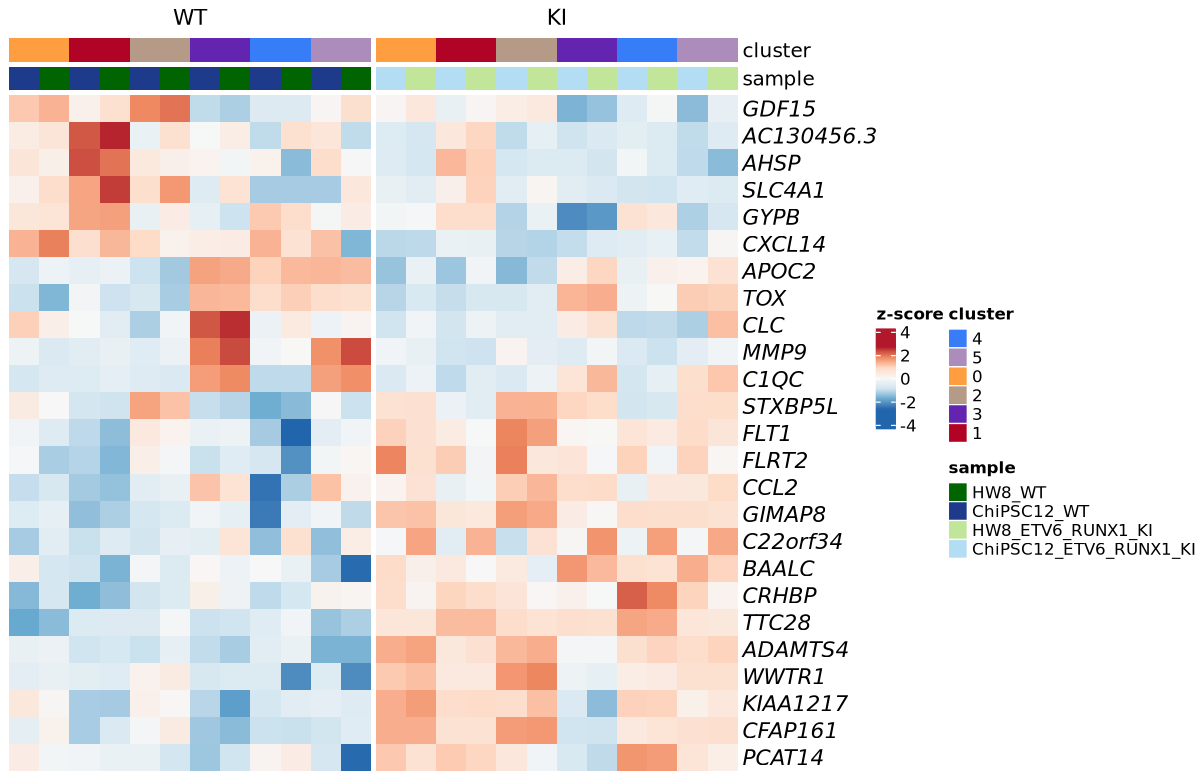

In [61]:
set.seed(123)


# Reorder the matrix columns according to the desired order
#logCPM_sc <- logCPM_sc[, desired_order]

ht_scaledlogcpm <- Heatmap(logCPM_sc, 
                           name = "z-score",
                           row_dend_reorder = TRUE,
                           column_dend_reorder = FALSE,
                           cluster_rows = TRUE, 
                           cluster_columns = FALSE, 
                           clustering_distance_column = "pearson",
                           top_annotation=colAnn,
                           row_title_rot = 0,
                           column_split = sampleinfo$etv6_runx1,
                           column_title_gp = gpar(fontsize = 13, family="Sans"),
                           row_title_gp = gpar(fontsize = 13, family="Sans"), 
                           column_names_gp = gpar(fontsize=13, family="Sans",  fontface = "italic"),
                           row_names_gp = gpar(fontsize = 13, family="Sans",  fontface = "italic"), 
                           show_row_dend = FALSE,
                           show_column_dend = FALSE, #, colorRamp2(c(-2,0,2),
                          show_column_names = FALSE,
                           #colorRamp2(c(-3,-2,-1, 0, 1,2,3),
                       colorRamp2(c(-2.7,-1.8,-0.9, 0, 0.9,1.8,2.7),
                          rev(c("#b2182b","#ef8a62","#fddbc7","#f7f7f7","#d1e5f0","#67a9cf","#2166ac")
                           
                          )
                          ))

fig (10,6.5)
draw(ht_scaledlogcpm)

In [62]:
pdf("./figs/DEGs_heatmap.pdf", width = 10, height = 6.5)
draw(ht_scaledlogcpm)
dev.off()

png 
  2

### Böiers et al., Developmental Cell 2018 
https://www.cell.com/developmental-cell/fulltext/S1534-5807(17)30990-5?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS1534580717309905%3Fshowall%3Dtrue

In [115]:
boiers <- c("EPOR", "IL7R", "EBF1", "PAX5", "CD33", "CSF1R", "SPI1", "CEBPA", "FLT3", "MPL")

In [117]:
boiers

[1] "EPOR"  "IL7R"  "EBF1"  "PAX5"  "CD33"  "CSF1R" "SPI1"  "CEBPA" "FLT3" 
[10] "MPL"

In [118]:
# Assuming `logCPM_sc` is a matrix and `colAnn` is the annotation
logcpm_CC = logcpm[boiers,]  #genes_selection
logcpm_CC_t = t(logcpm_CC)
logCPM_sc <- (scale(t(logcpm_CC_t)))

In [119]:
head(logCPM_sc)

,ChiPSC12_ETV6_RUNX1_KI_0,ChiPSC12_WT_0,HW8_ETV6_RUNX1_KI_0,HW8_WT_0,ChiPSC12_ETV6_RUNX1_KI_1,ChiPSC12_WT_1,HW8_ETV6_RUNX1_KI_1,HW8_WT_1,ChiPSC12_ETV6_RUNX1_KI_2,ChiPSC12_WT_2,⋯,HW8_ETV6_RUNX1_KI_3,HW8_WT_3,ChiPSC12_ETV6_RUNX1_KI_4,ChiPSC12_WT_4,HW8_ETV6_RUNX1_KI_4,HW8_WT_4,ChiPSC12_ETV6_RUNX1_KI_5,ChiPSC12_WT_5,HW8_ETV6_RUNX1_KI_5,HW8_WT_5
EPOR,1.1076770,1.1104478,1.01765586,1.27976016,0.9157028,0.9553254,0.8865451,1.3371580,1.3467950,1.24339889,⋯,-0.2128616,-0.3835081,0.5391432,0.5034083,0.5240018,0.5416092,0.28967407,0.3466597,0.1902302,0.3852145
IL7R,-0.2700928,0.4345914,-0.60766180,-0.42489754,-1.0239559,-0.5630594,-1.0948381,-0.4621404,-0.2663448,0.88475457,⋯,0.4867795,0.8828602,-1.2771551,-1.0866874,-1.0175997,-1.0965145,0.07631388,0.4296923,0.3209673,0.7872052
EBF1,-0.4964419,-0.7931091,0.08032942,0.01588996,-0.7556364,-0.8670732,-0.7843288,-0.8481883,-0.1667434,-0.36547388,⋯,-1.3691064,-1.3143112,-0.7460492,-1.0866874,-0.7799305,-1.0965145,-1.19265851,-1.0355219,-0.7827704,-1.3931981
PAX5,-1.3780425,-1.4762114,-1.33759790,-1.14000421,-1.0239559,-1.3033284,-0.9648100,-1.0159275,-1.0681427,-1.53209464,⋯,-1.4206819,-1.3143112,-0.8810543,-1.0866874,-1.1793392,-1.0965145,-1.54177485,-1.0355219,-1.6247373,-1.3931981
CD33,0.3852799,-0.1853774,0.25981908,0.11149615,0.9364191,0.9937682,0.9204568,0.8054979,-0.1872523,-0.56857726,⋯,0.6610190,0.5516677,0.9618010,0.9499129,0.9612941,1.0161279,0.67972776,0.5379570,0.5241377,0.4723372
CSF1R,0.8645856,0.7807923,0.95160837,0.54011526,0.7364441,0.6674098,0.8253180,0.5224505,0.3115327,0.08276041,⋯,1.1968433,1.0975045,1.0473923,0.9710849,1.0871913,0.8761787,1.03484531,0.9593049,1.0951644,0.8670116


In [121]:
boiers <- c("EPOR", "IL7R", "EBF1", "CD33", "CSF1R", "SPI1", "CEBPA", "FLT3", "MPL", "PAX5")

In [125]:
boiers <- c("EPOR", "IL7R", 
            "EBF1", "PAX5",
            "CD33", "CSF1R", 
            "SPI1", "CEBPA", 
            "FLT3", "MPL")



In [126]:
# Assuming `logCPM_sc` is a matrix and `colAnn` is the annotation
logcpm_CC = logcpm[boiers,]  #genes_selection
logcpm_CC_t = t(logcpm_CC)
#logCPM_sc <- (scale(t(logcpm_CC_t)))

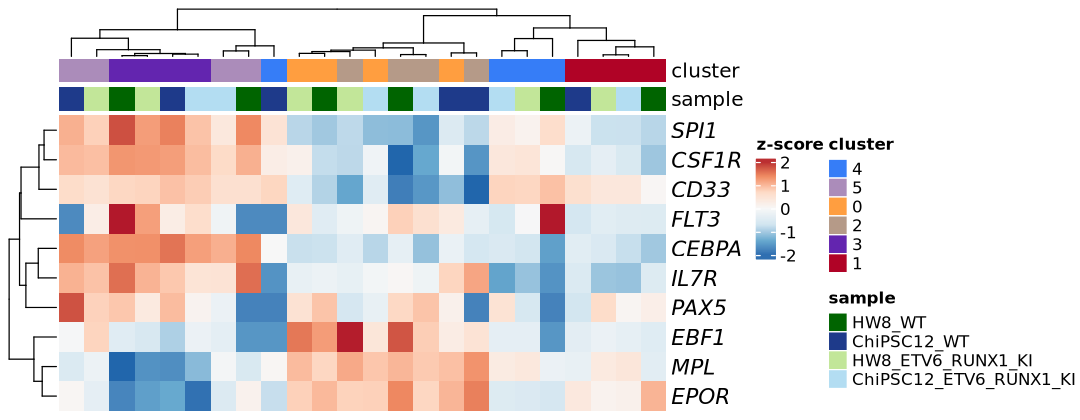

In [130]:
logCPM_sc <- t(scale(t(logcpm_CC))) #scale each row (each gene) to have mean zero and standard deviation one:for ML

ht_scaledlogcpm <- Heatmap(logCPM_sc, 
                           name = "z-score",
                           row_dend_reorder = TRUE,
                           column_dend_reorder = TRUE,
                           cluster_rows = TRUE, 
                           cluster_columns = TRUE,  # Ensure no clustering of columns
                           clustering_distance_column = "pearson",
                           top_annotation = colAnn,
                           column_title_gp = gpar(fontsize = 13, family="Sans"),
                           row_title_gp = gpar(fontsize = 3, family="Sans"),
                           column_names_gp = gpar(fontsize=13, family="Sans",  fontface = "italic"),
                           row_names_gp = gpar(fontsize = 13, family="Sans",  fontface = "italic"), 
                           show_row_dend = TRUE,
                           show_column_dend = TRUE,  # Disable column dendrogram for exact order
                           show_column_names = FALSE,
                           col = colorRamp2(c(-2.1,-1.4,-0.7, 0, 0.7, 1.4, 2.1),
                        #  col = colorRamp2(c(-3,-2,-1, 0, 1, 2, 3),
                                            rev(c("#b2182b","#ef8a62","#fddbc7","#f7f7f7","#d1e5f0","#67a9cf","#2166ac"))
                                           ))

# Plot the heatmap
fig (9,3.5)
draw(ht_scaledlogcpm)


In [131]:
pdf("./figs/Boiers_ourdata_heatmap.pdf",
         width = 9, height = 3.5)
ht_scaledlogcpm

dev.off()

png 
  2